In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
df=pd.read_csv('asiacup.csv')
df.head()

Team   Opponent Format   Ground  Year  Toss Selection  Run Scored  \
0   Pakistan  Sri Lanka    ODI  Sharjah  1984  Lose   Batting       187.0   
1  Sri Lanka   Pakistan    ODI  Sharjah  1984   Win   Bowling       190.0   
2      India  Sri Lanka    ODI  Sharjah  1984   Win   Bowling        97.0   
3  Sri Lanka      India    ODI  Sharjah  1984  Lose   Batting        96.0   
4      India   Pakistan    ODI  Sharjah  1984   Win   Batting       188.0   

   Wicket Lost  Fours  Sixes  Extras  Run Rate  Avg Bat Strike Rate  \
0          9.0    9.0    3.0    21.0      4.06                52.04   
1          5.0   11.0    1.0    26.0      4.36                68.51   
2          0.0    9.0    0.0    14.0      4.47                60.48   
3         10.0    7.0    0.0     8.0      2.34                25.74   
4          4.0   13.0    3.0    17.0      4.08                60.21   

   Highest Score  Wicket Taken  Given Extras  Highest Individual wicket  \
0           47.0           5.0          26.0                        2.0   
1           57.0           9.0          21.0                        3.0   
2           51.0          10.0           8.0                        3.0   
3           38.0           0.0          14.0                        0.0   
4           56.0          10.0           5.0                        3.0   

  Player Of The Match Result  
0            Roy Dias   Lose  
1            Roy Dias    Win  
2     Surinder Khanna    Win  
3     Surinder Khanna   Lose  
4     Surinder Khanna    Win

In [3]:
df.describe()

Year  Run Scored  Wicket Lost       Fours       Sixes  \
count   254.000000  252.000000   252.000000  252.000000  252.000000   
mean   2006.905512  201.920635     6.892857   15.626984    2.912698   
std      11.014495   67.331860     2.874609    7.754946    2.596411   
min    1984.000000   38.000000     0.000000    0.000000    0.000000   
25%    1997.750000  147.000000     5.000000   10.000000    1.000000   
50%    2008.000000  193.000000     7.000000   15.000000    2.000000   
75%    2016.000000  253.250000    10.000000   20.000000    4.250000   
max    2022.000000  385.000000    10.000000   41.000000   14.000000   

           Extras    Run Rate  Avg Bat Strike Rate  Highest Score  \
count  252.000000  252.000000           252.000000     252.000000   
mean    13.238095    5.308214            76.676667      69.309524   
std      7.621973    1.584823            30.678228      29.813488   
min      0.000000    2.200000            24.630000       8.000000   
25%      8.000000    4.227500            54.742500      47.000000   
50%     12.000000    5.090000            73.155000      66.500000   
75%     18.000000    6.100000            92.897500      85.000000   
max     38.000000   10.600000           194.050000     183.000000   

       Wicket Taken  Given Extras  Highest Individual wicket  
count    252.000000    252.000000                 252.000000  
mean       6.892857     13.238095                   2.563492  
std        2.874609      7.621973                   1.100496  
min        0.000000      0.000000                   0.000000  
25%        5.000000      8.000000                   2.000000  
50%        7.000000     12.000000                   3.000000  
75%       10.000000     18.000000                   3.000000  
max       10.000000     38.000000                   6.000000

In [4]:
df.dtypes

Team                          object
Opponent                      object
Format                        object
Ground                        object
Year                           int64
Toss                          object
Selection                     object
Run Scored                   float64
Wicket Lost                  float64
Fours                        float64
Sixes                        float64
Extras                       float64
Run Rate                     float64
Avg Bat Strike Rate          float64
Highest Score                float64
Wicket Taken                 float64
Given Extras                 float64
Highest Individual wicket    float64
Player Of The Match           object
Result                        object
dtype: object

In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Team                         0
Opponent                     0
Format                       0
Ground                       0
Year                         0
Toss                         0
Selection                    0
Run Scored                   2
Wicket Lost                  2
Fours                        2
Sixes                        2
Extras                       2
Run Rate                     2
Avg Bat Strike Rate          2
Highest Score                2
Wicket Taken                 2
Given Extras                 2
Highest Individual wicket    2
Player Of The Match          2
Result                       0
dtype: int64


In [6]:
from sklearn.impute import SimpleImputer

# List of numerical columns with missing values
numerical_columns_with_missing = ['Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
                                  'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken', 'Given Extras',
                                  'Highest Individual wicket']

# Initialize SimpleImputer with the strategy to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fill missing values in numerical columns
df[numerical_columns_with_missing] = imputer.fit_transform(df[numerical_columns_with_missing])

In [7]:
df = df[~df['Result'].str.contains('D/L', case=False, na=False)]
df['Result']

0      Lose
1       Win
2       Win
3      Lose
4       Win
       ... 
249     Win
250    Lose
251     Win
252    Lose
253     Win
Name: Result, Length: 252, dtype: object

In [8]:
df

Team     Opponent Format      Ground  Year  Toss Selection  \
0     Pakistan    Sri Lanka    ODI     Sharjah  1984  Lose   Batting   
1    Sri Lanka     Pakistan    ODI     Sharjah  1984   Win   Bowling   
2        India    Sri Lanka    ODI     Sharjah  1984   Win   Bowling   
3    Sri Lanka        India    ODI     Sharjah  1984  Lose   Batting   
4        India     Pakistan    ODI     Sharjah  1984   Win   Batting   
..         ...          ...    ...         ...   ...   ...       ...   
249      India  Afghanistan   T20I  Dubai(DSC)  2022  Lose   Batting   
250   Pakistan    Sri Lanka   T20I  Dubai(DSC)  2022  Lose   Batting   
251  Sri Lanka     Pakistan   T20I  Dubai(DSC)  2022   Win   Bowling   
252   Pakistan    Sri Lanka   T20I  Dubai(DSC)  2022   Win   Bowling   
253  Sri Lanka     Pakistan   T20I  Dubai(DSC)  2022  Lose   Batting   

     Run Scored  Wicket Lost  Fours  Sixes  Extras  Run Rate  \
0         187.0          9.0    9.0    3.0    21.0      4.06   
1         190.0          5.0   11.0    1.0    26.0      4.36   
2          97.0          0.0    9.0    0.0    14.0      4.47   
3          96.0         10.0    7.0    0.0     8.0      2.34   
4         188.0          4.0   13.0    3.0    17.0      4.08   
..          ...          ...    ...    ...     ...       ...   
249       212.0          2.0   21.0    9.0     2.0     10.60   
250       121.0         10.0    4.0    3.0    17.0      6.31   
251       124.0          5.0    9.0    5.0     5.0      7.29   
252       147.0         10.0    9.0    4.0    14.0      7.35   
253       170.0          6.0   16.0    5.0    10.0      8.50   

     Avg Bat Strike Rate  Highest Score  Wicket Taken  Given Extras  \
0                  52.04           47.0           5.0          26.0   
1                  68.51           57.0           9.0          21.0   
2                  60.48           51.0          10.0           8.0   
3                  25.74           38.0           0.0          14.0   
4                  60.21           56.0          10.0           5.0   
..                   ...            ...           ...           ...   
249               194.05          122.0           8.0           3.0   
250                58.78           30.0           5.0           5.0   
251               111.50           55.0          10.0          17.0   
252                99.38           55.0           6.0          10.0   
253                90.86           71.0          10.0          14.0   

     Highest Individual wicket         Player Of The Match Result  
0                          2.0                    Roy Dias   Lose  
1                          3.0                    Roy Dias    Win  
2                          3.0             Surinder Khanna    Win  
3                          0.0             Surinder Khanna   Lose  
4                          3.0             Surinder Khanna    Win  
..                         ...                         ...    ...  
249                        5.0                 Virat Kohli    Win  
250                        2.0  Wanindu Hasaranga de Silva   Lose  
251                        3.0  Wanindu Hasaranga de Silva    Win  
252                        3.0           Bhanuka Rajapaksa   Lose  
253                        4.0           Bhanuka Rajapaksa    Win  

[252 rows x 20 columns]

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the "Result" column directly
df['Result'] = label_encoder.fit_transform(df['Result'])

# Display the encoded DataFrame
print(df.head())

        Team   Opponent Format   Ground  Year  Toss Selection  Run Scored  \
0   Pakistan  Sri Lanka    ODI  Sharjah  1984  Lose   Batting       187.0   
1  Sri Lanka   Pakistan    ODI  Sharjah  1984   Win   Bowling       190.0   
2      India  Sri Lanka    ODI  Sharjah  1984   Win   Bowling        97.0   
3  Sri Lanka      India    ODI  Sharjah  1984  Lose   Batting        96.0   
4      India   Pakistan    ODI  Sharjah  1984   Win   Batting       188.0   

   Wicket Lost  Fours  Sixes  Extras  Run Rate  Avg Bat Strike Rate  \
0          9.0    9.0    3.0    21.0      4.06                52.04   
1          5.0   11.0    1.0    26.0      4.36                68.51   
2          0.0    9.0    0.0    14.0      4.47                60.48   
3         10.0    7.0    0.0     8.0      2.34                25.74   
4          4.0   13.0    3.0    17.0      4.08                60.21   

   Highest Score  Wicket Taken  Given Extras  Highest Individual wicket  \
0           47.0           5.0     

In [10]:
df.dtypes

Team                          object
Opponent                      object
Format                        object
Ground                        object
Year                           int64
Toss                          object
Selection                     object
Run Scored                   float64
Wicket Lost                  float64
Fours                        float64
Sixes                        float64
Extras                       float64
Run Rate                     float64
Avg Bat Strike Rate          float64
Highest Score                float64
Wicket Taken                 float64
Given Extras                 float64
Highest Individual wicket    float64
Player Of The Match           object
Result                         int64
dtype: object

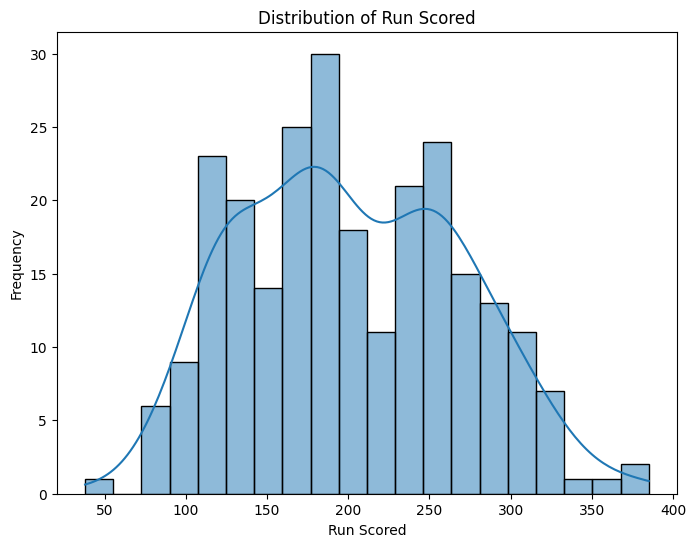

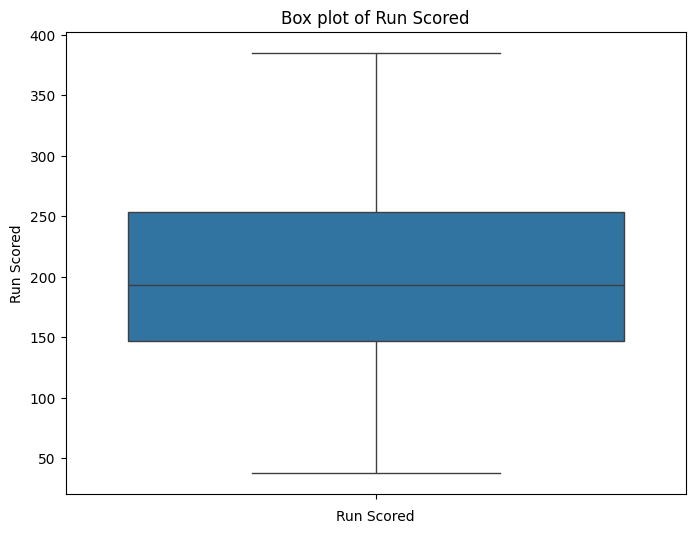

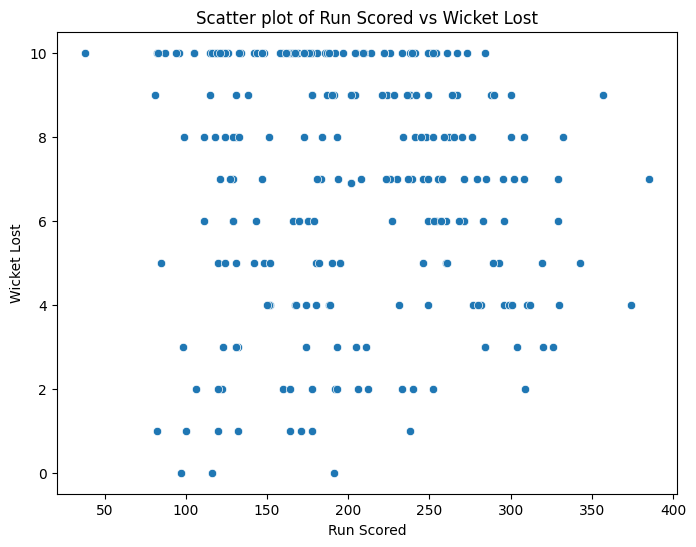

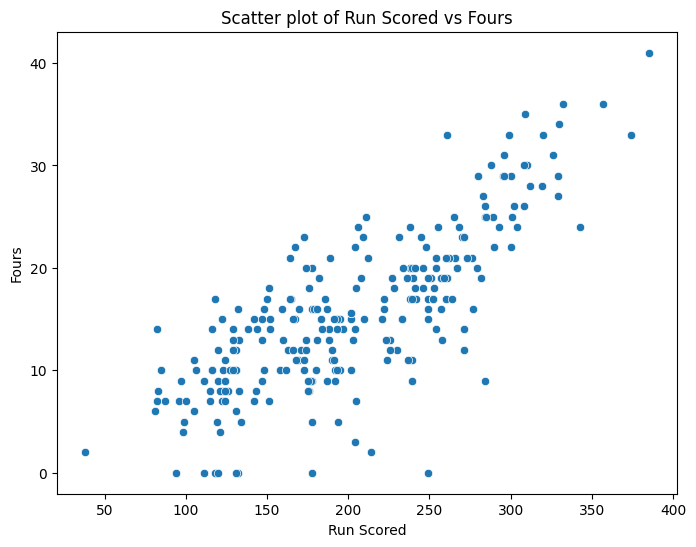

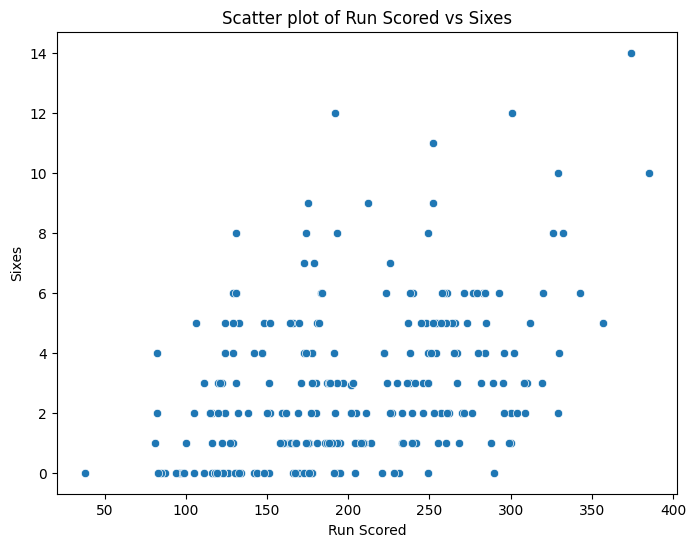

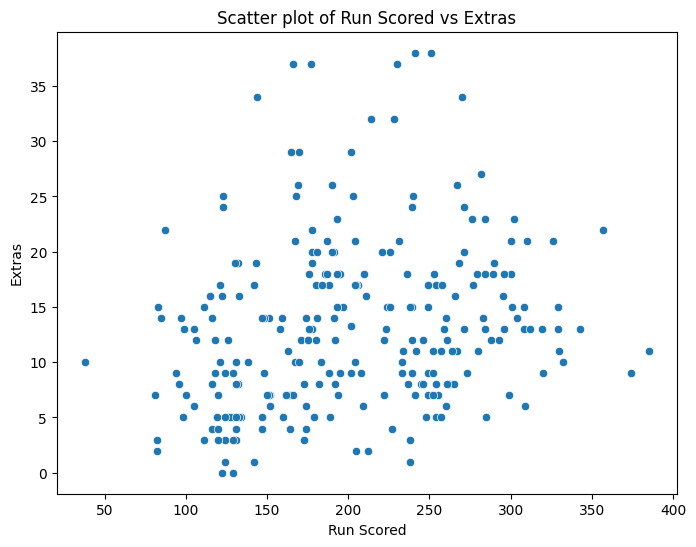

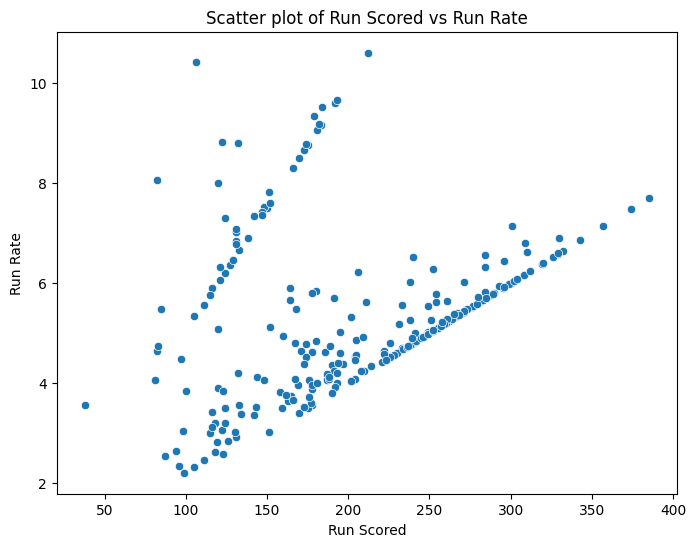

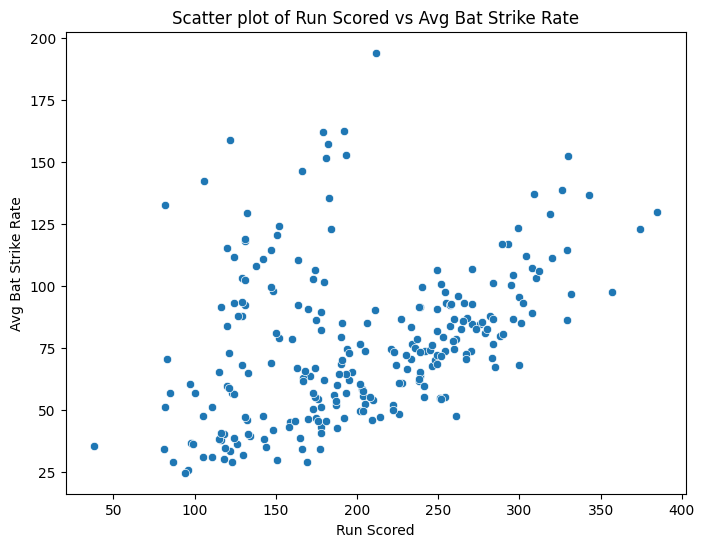

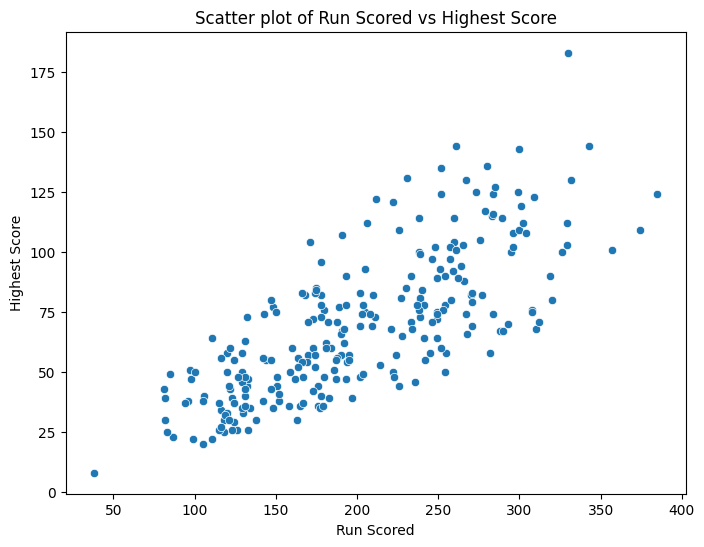

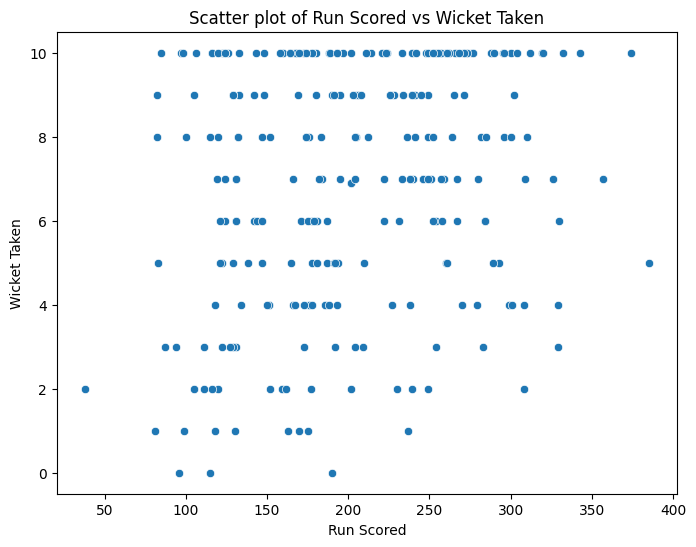

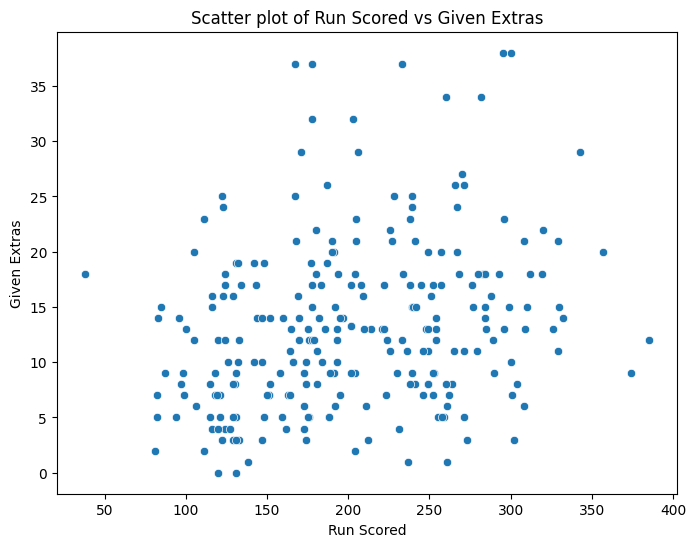

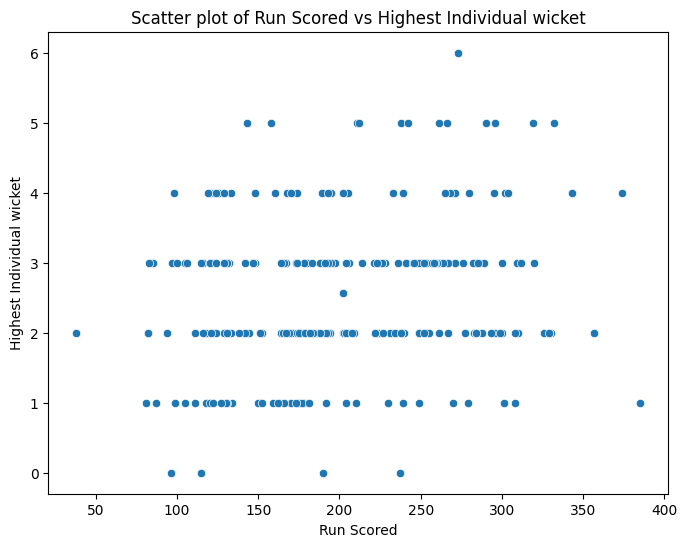

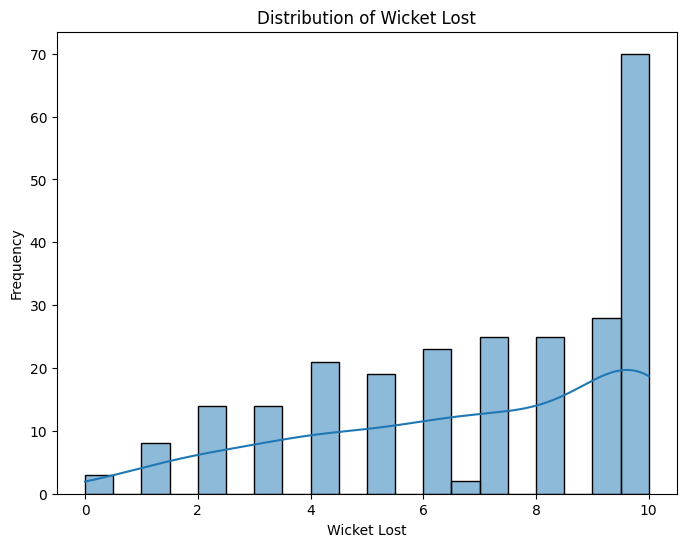

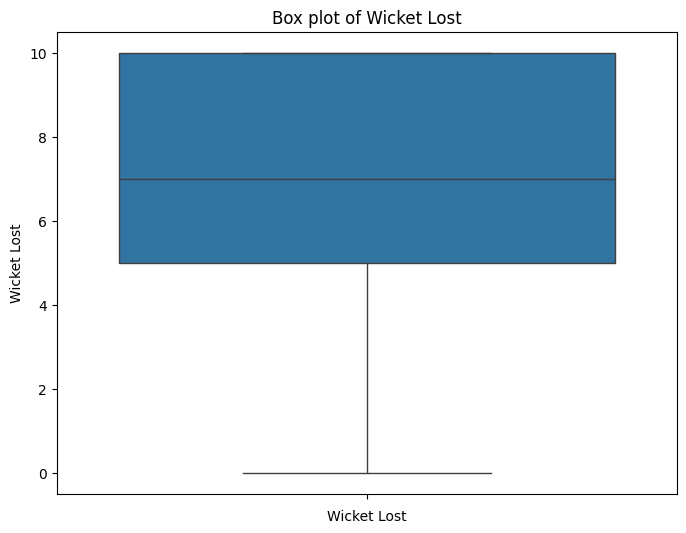

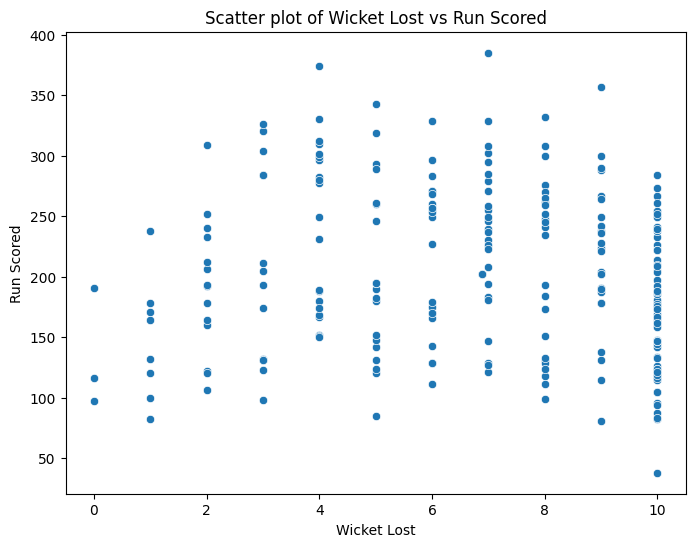

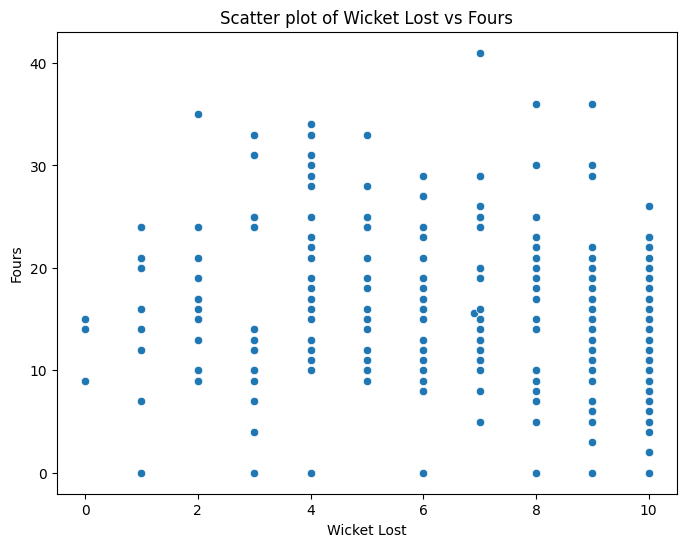

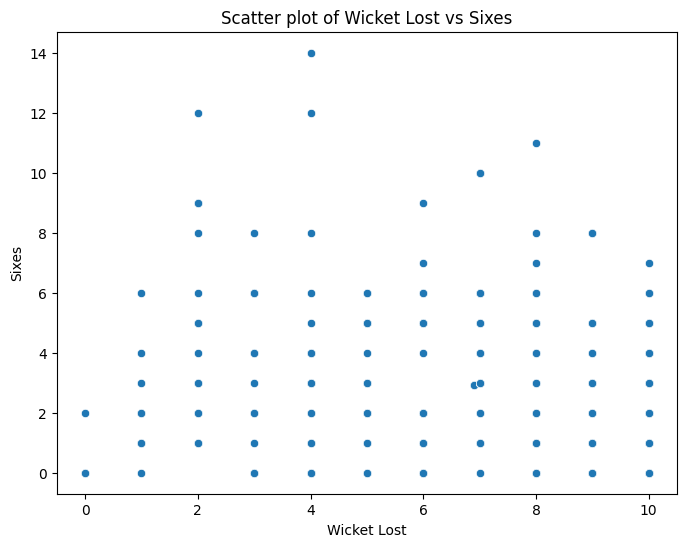

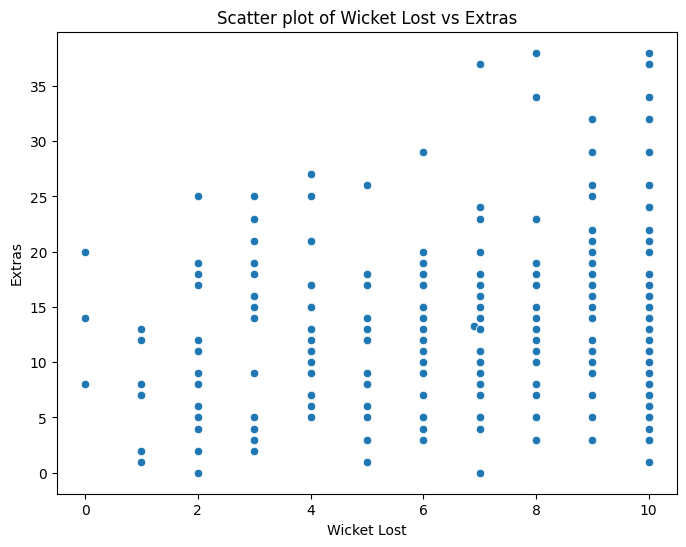

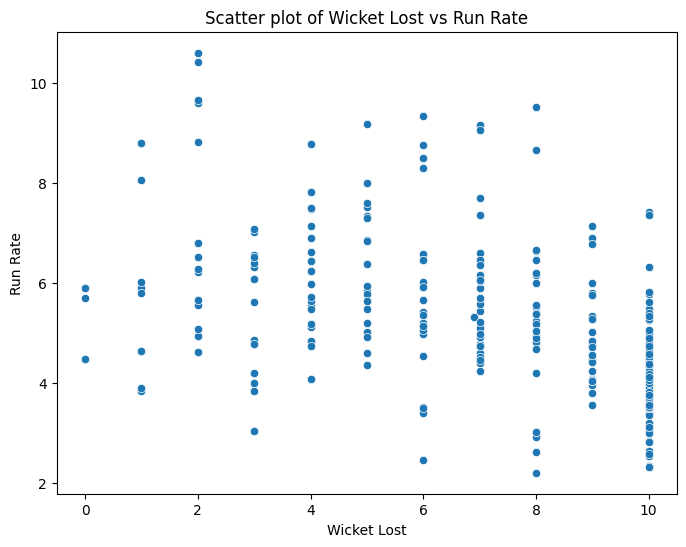

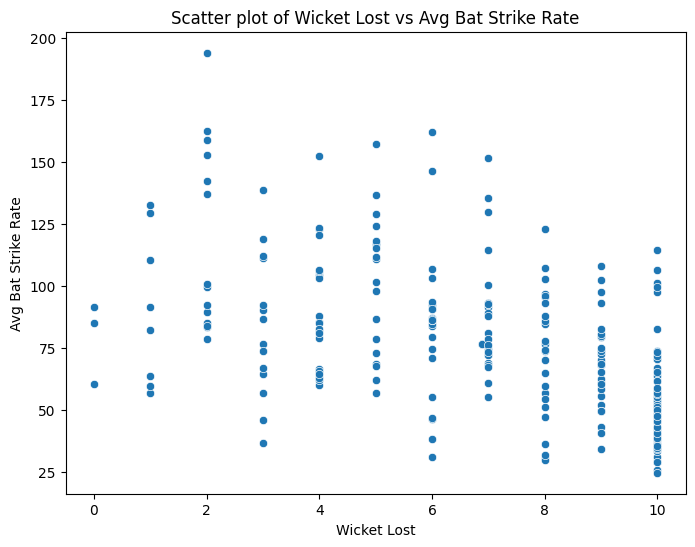

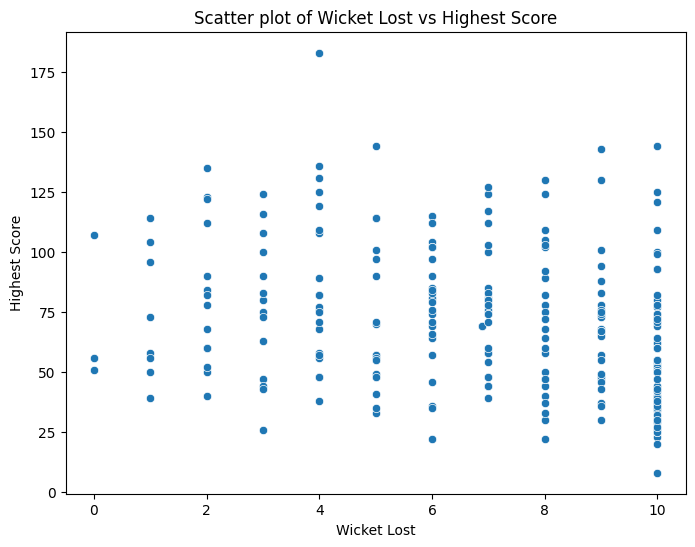

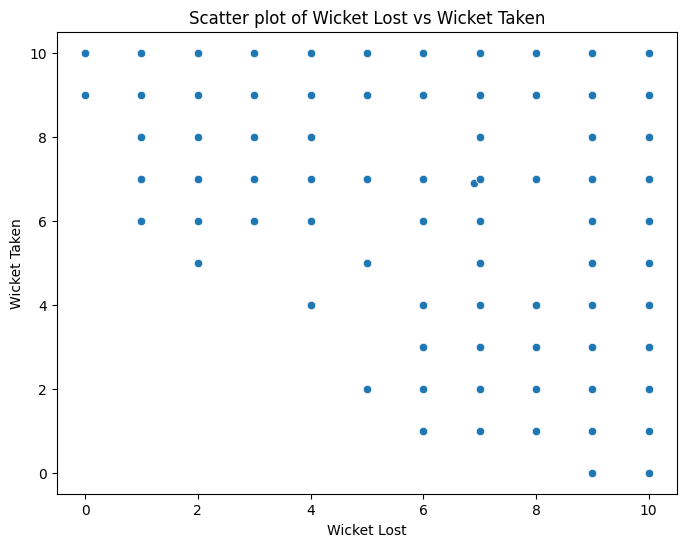

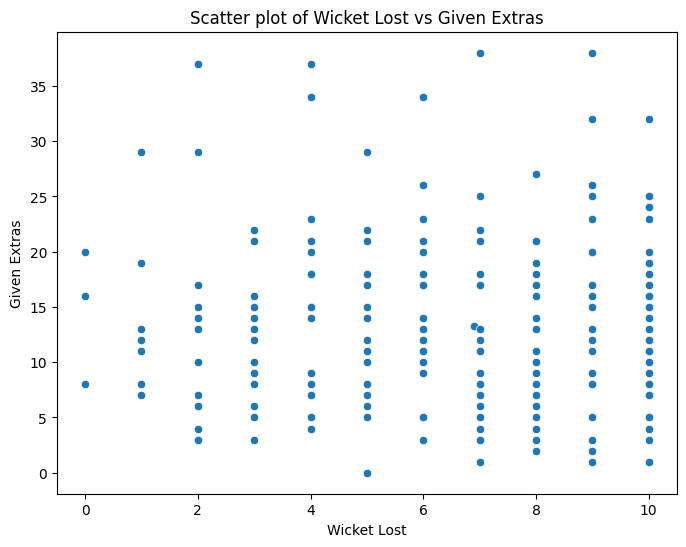

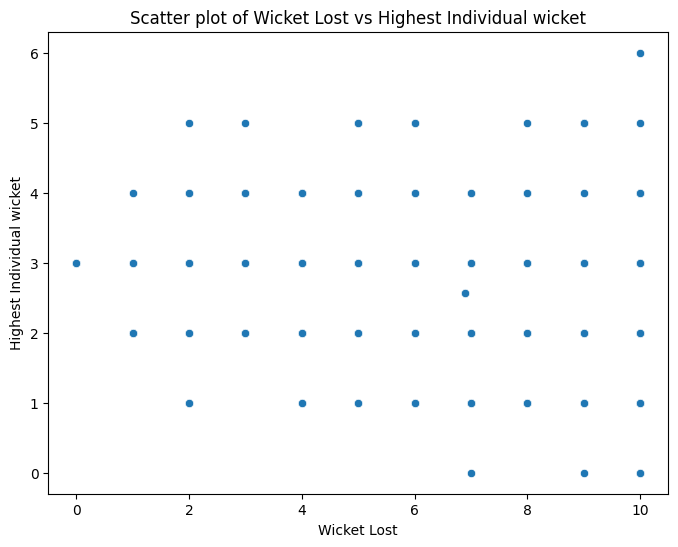

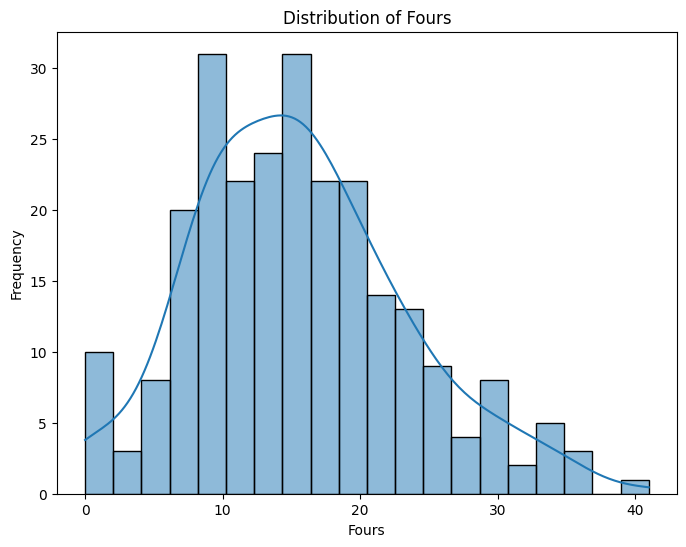

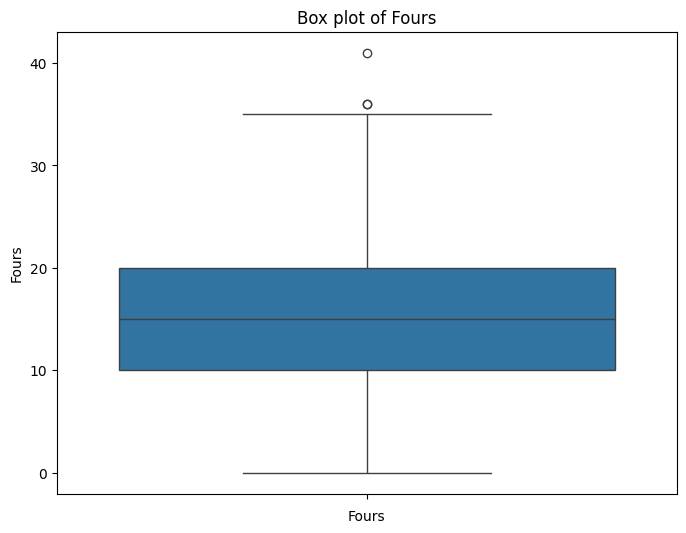

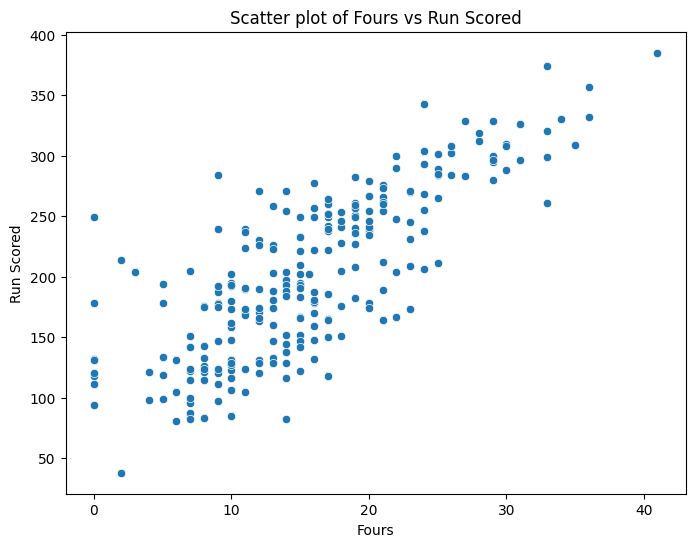

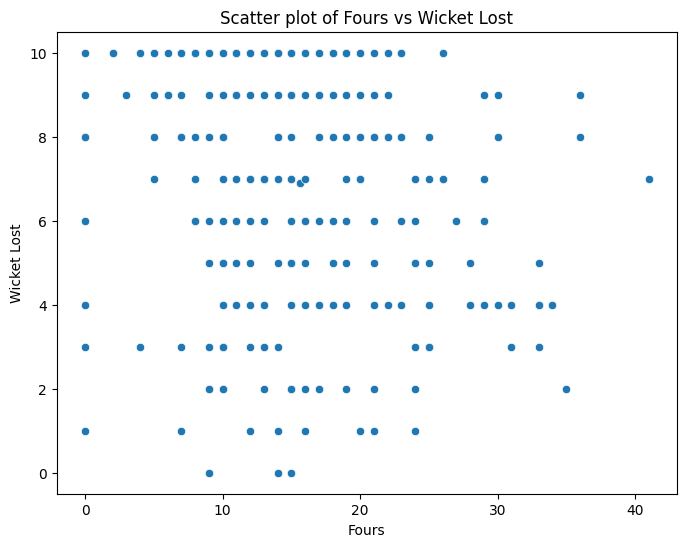

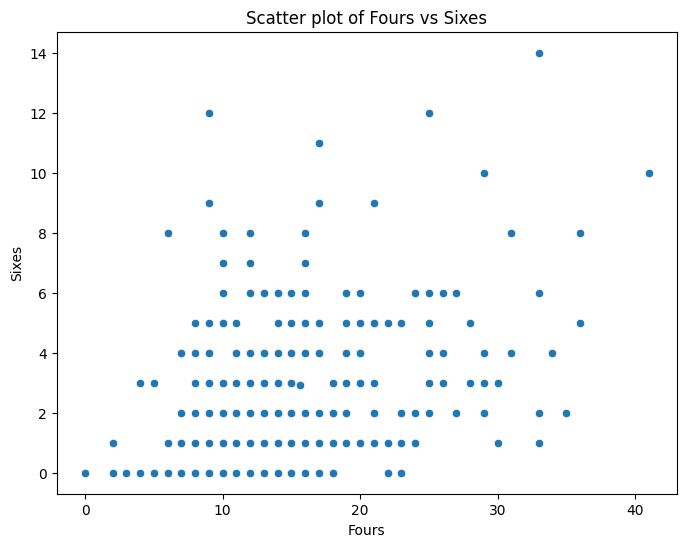

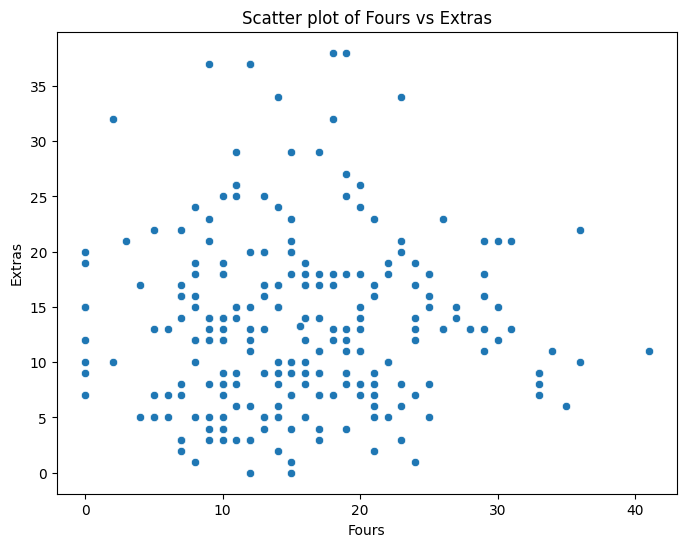

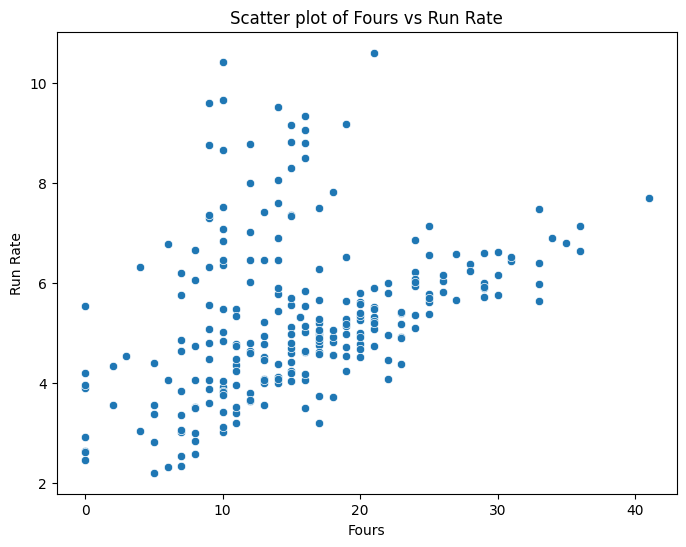

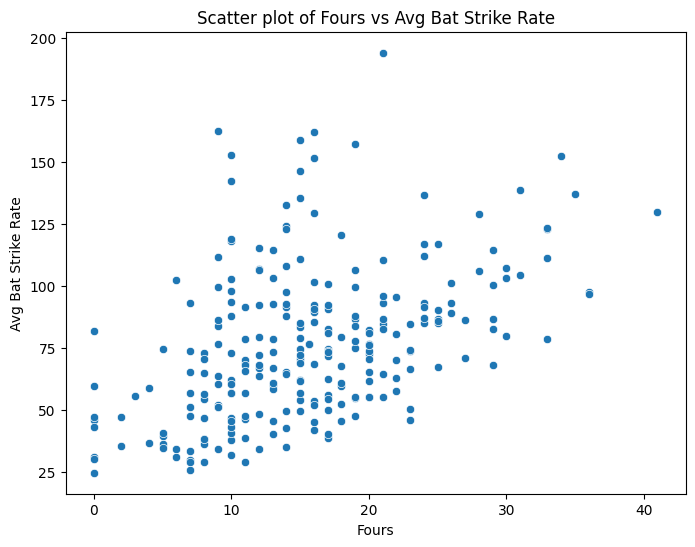

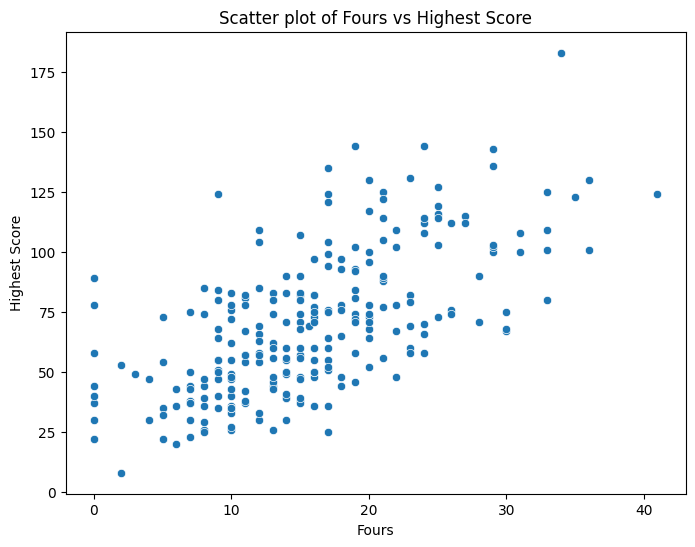

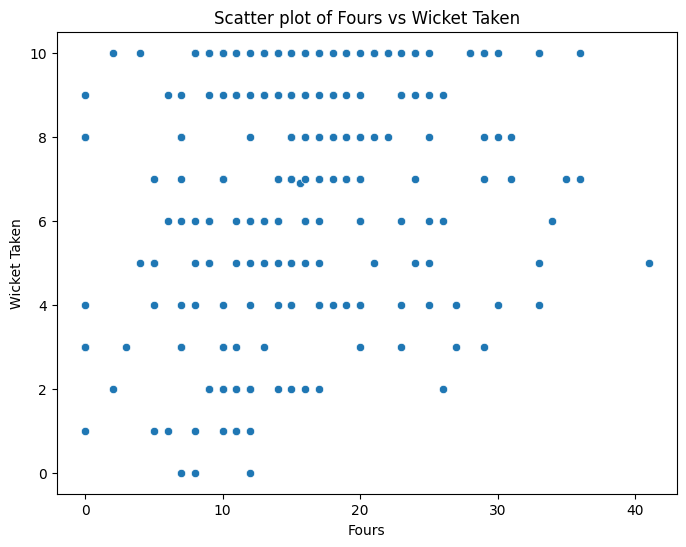

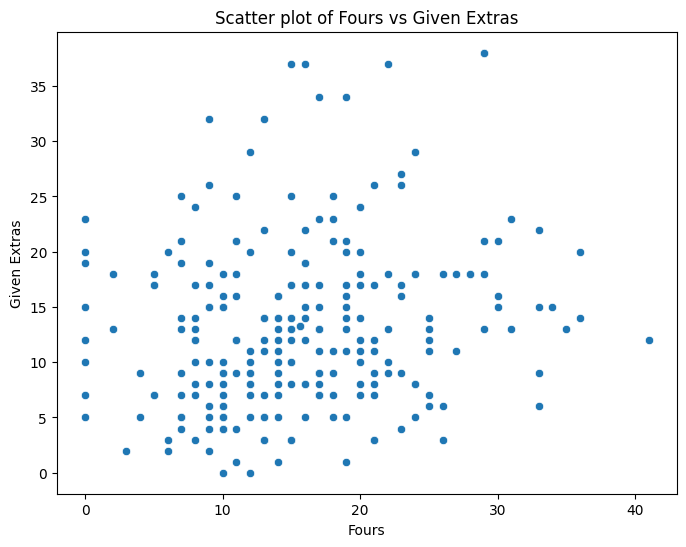

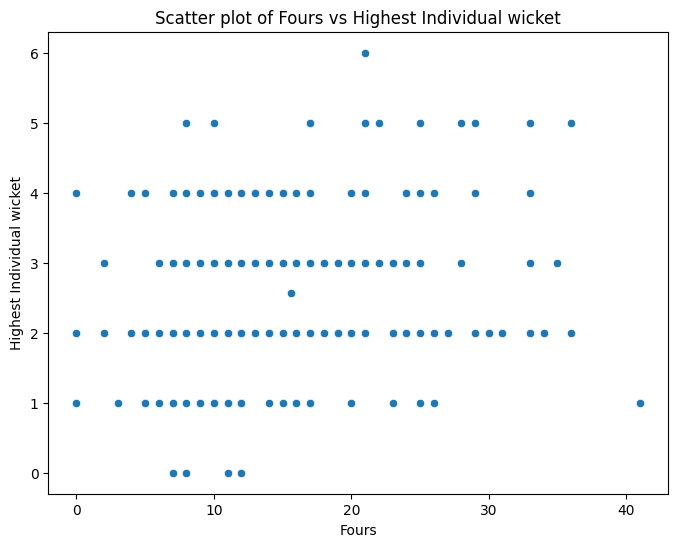

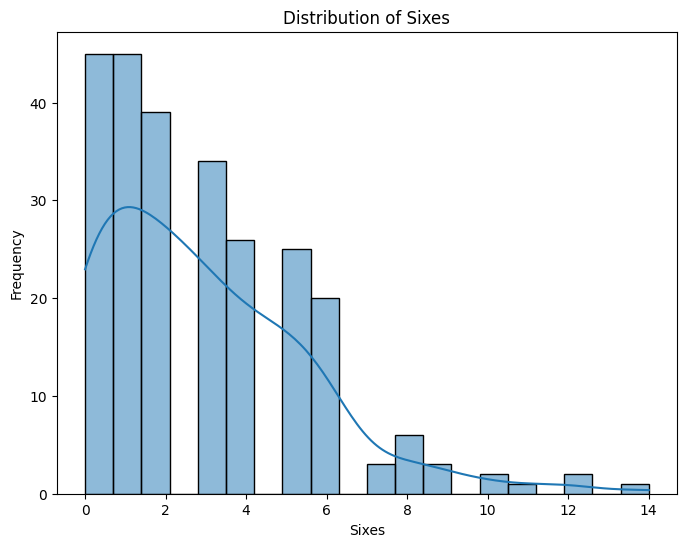

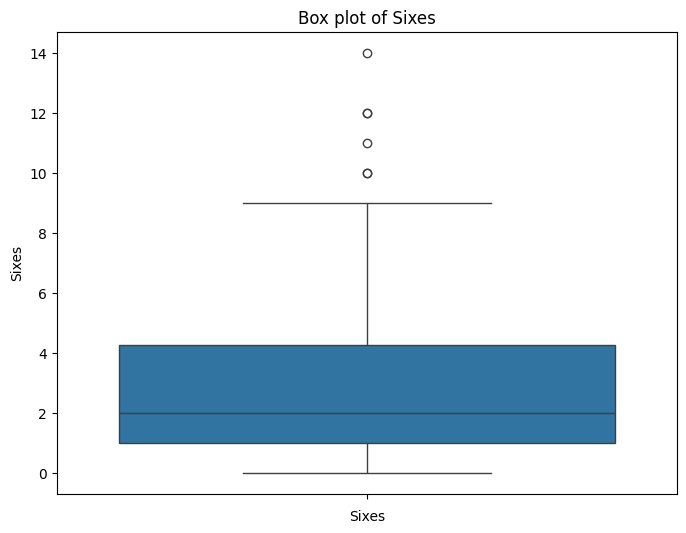

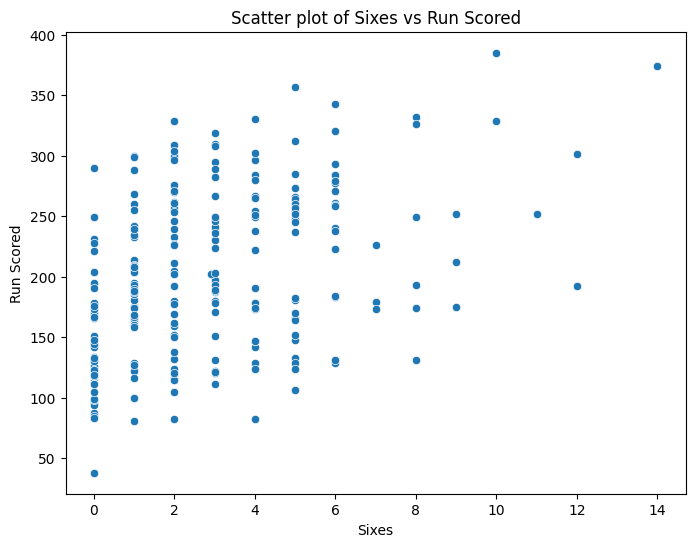

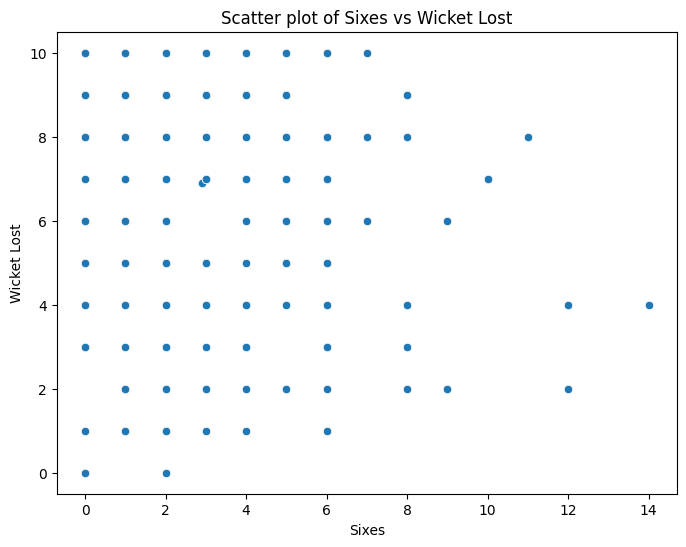

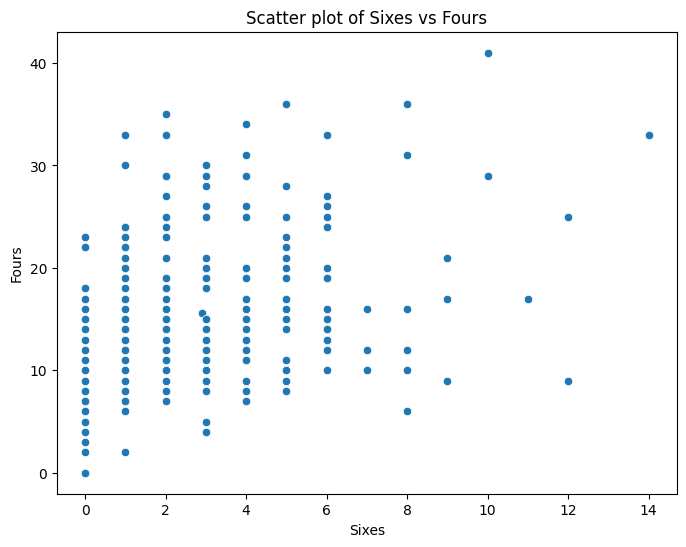

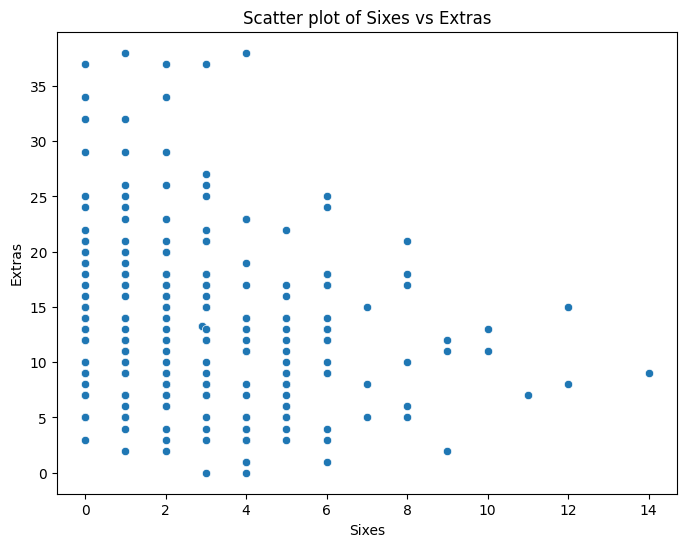

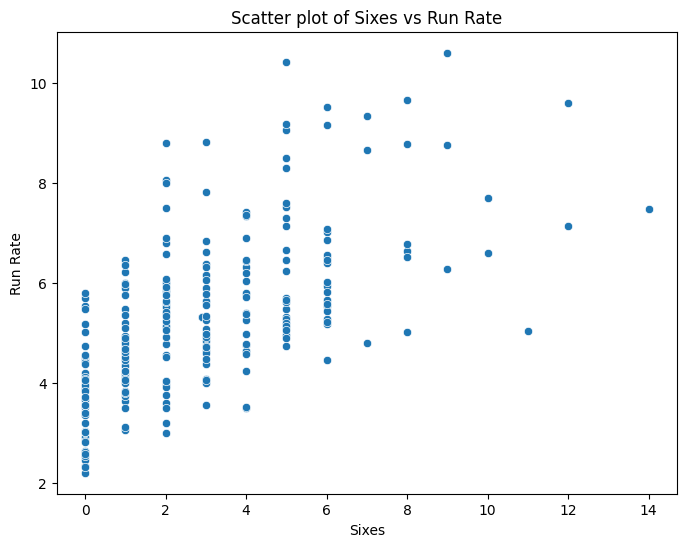

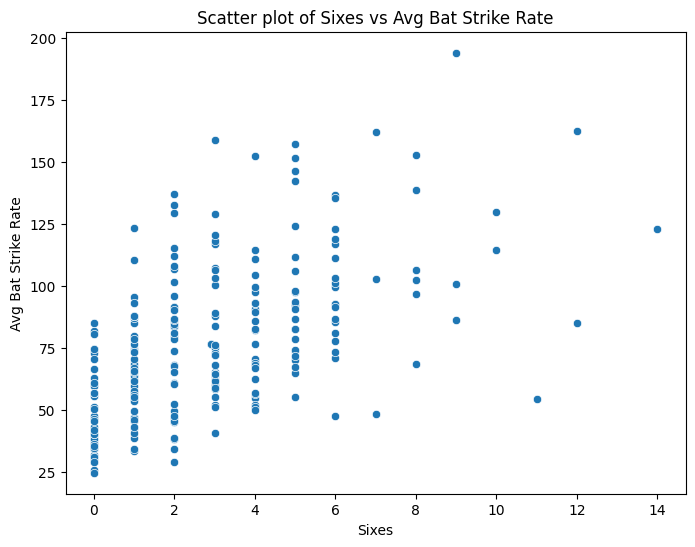

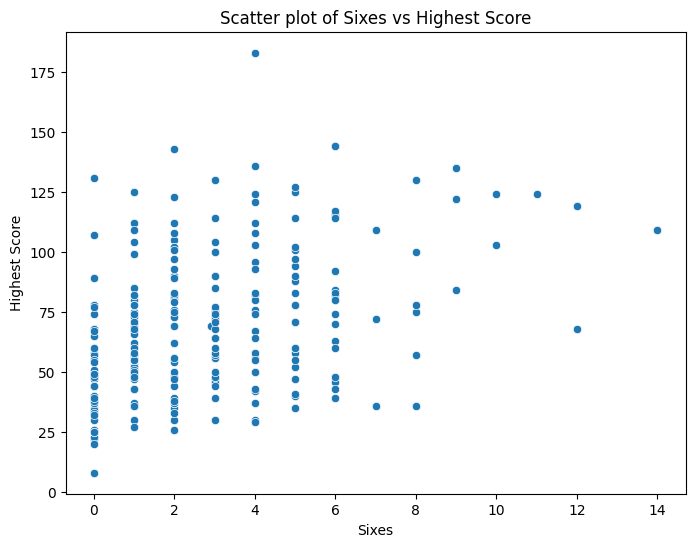

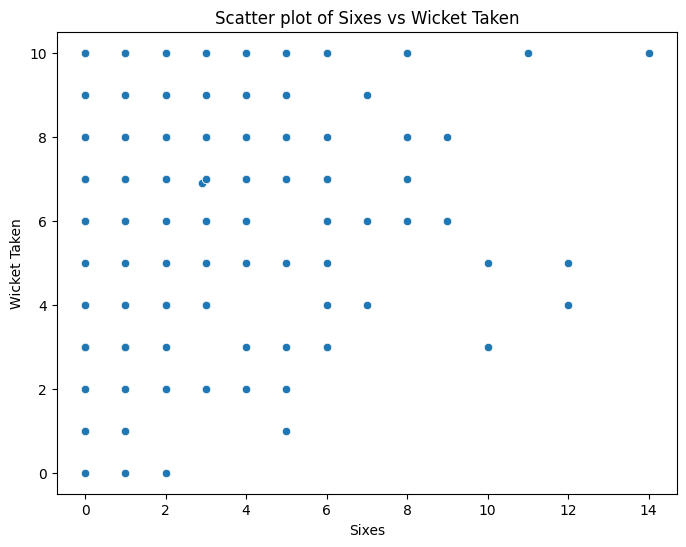

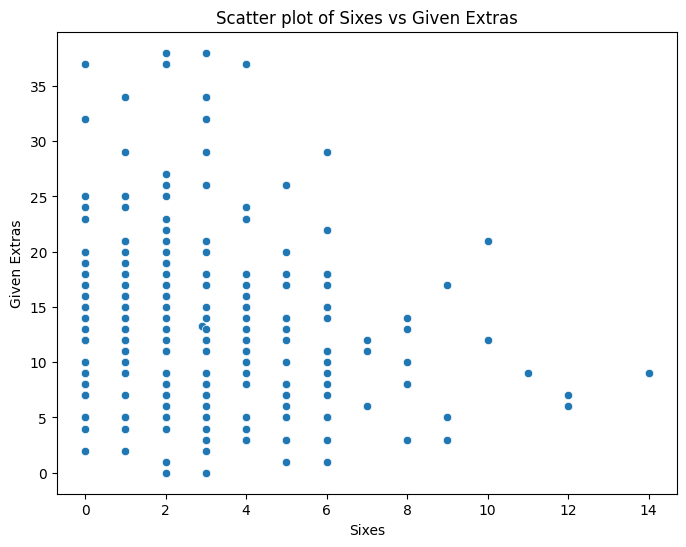

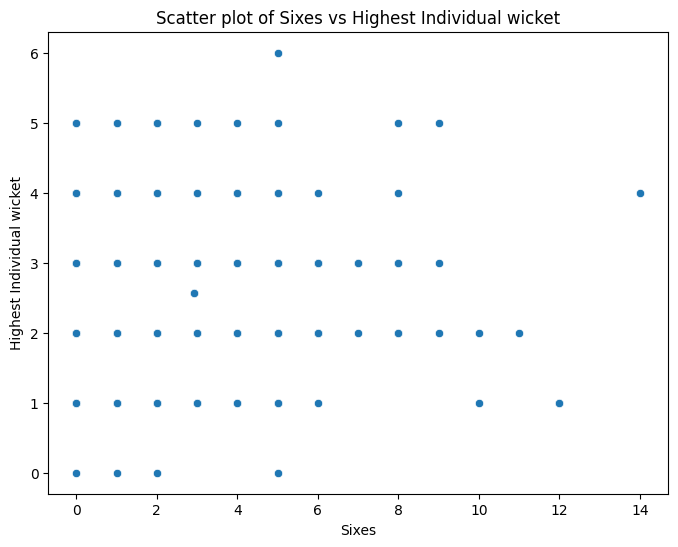

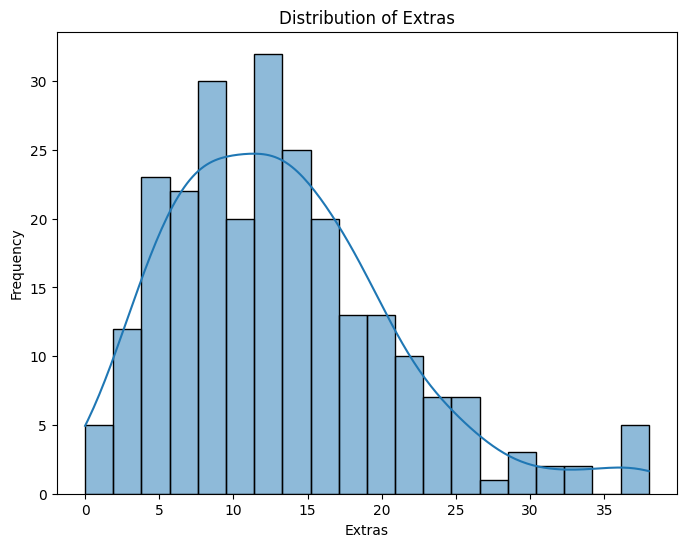

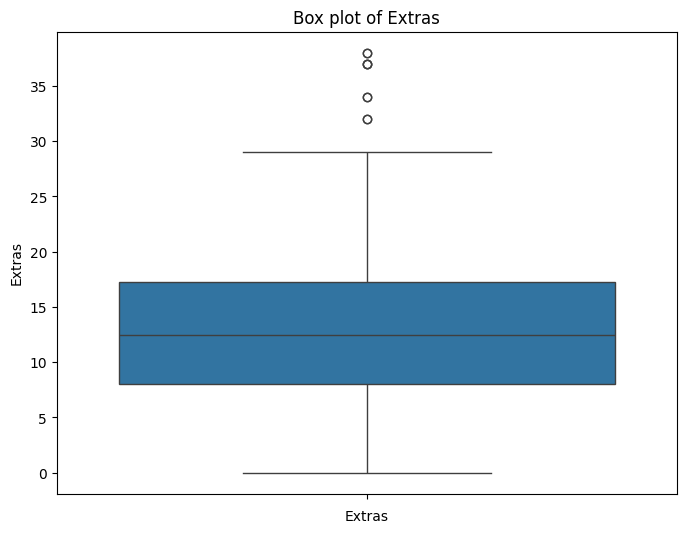

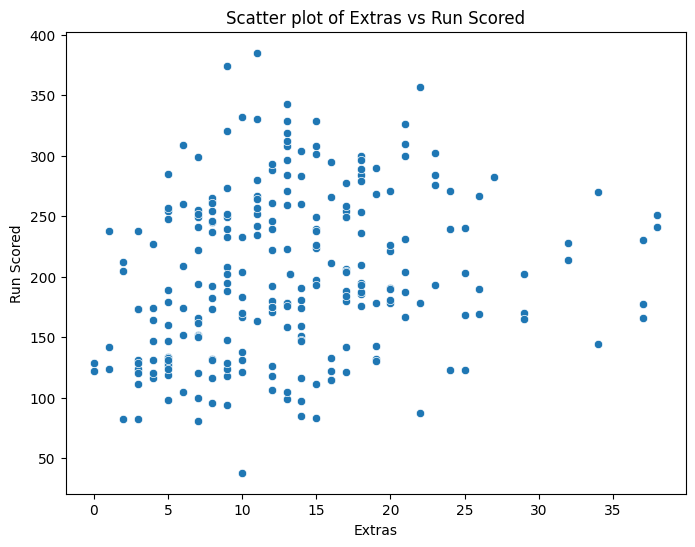

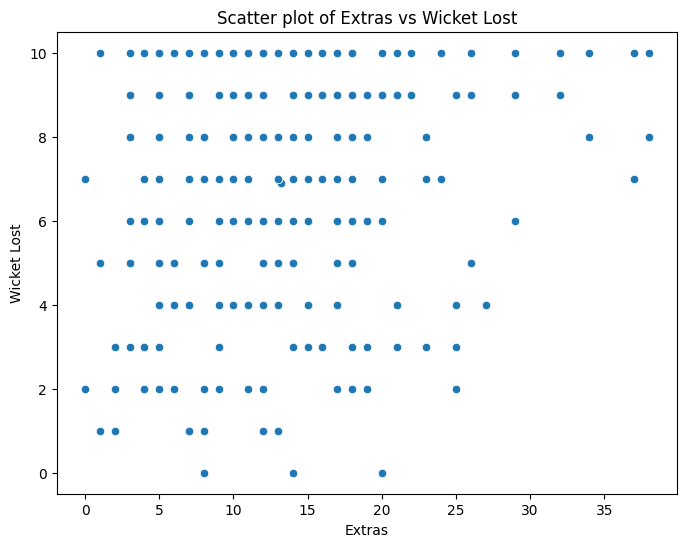

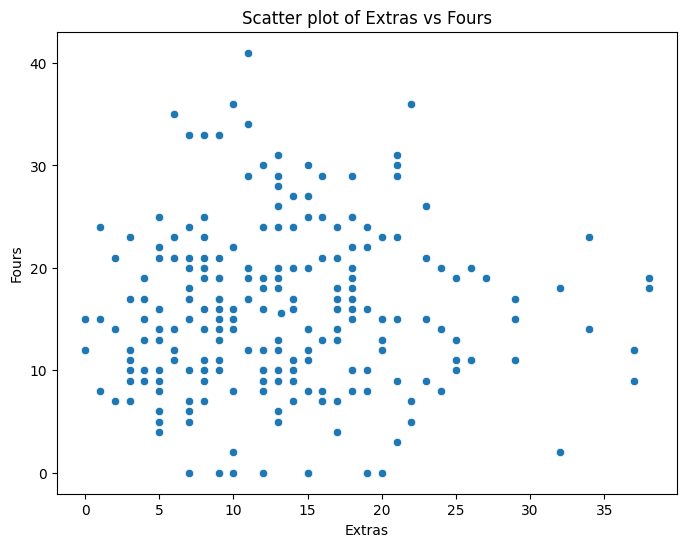

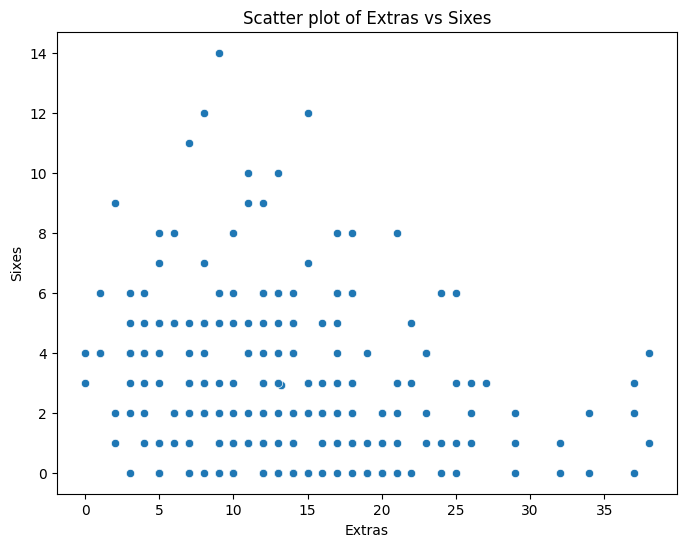

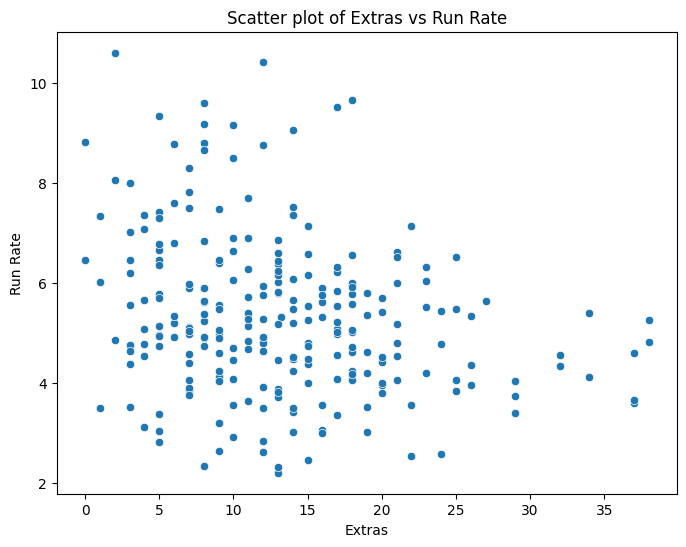

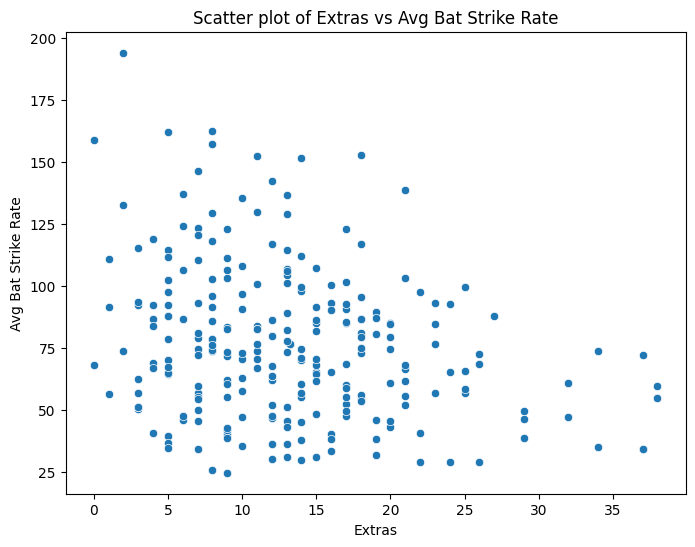

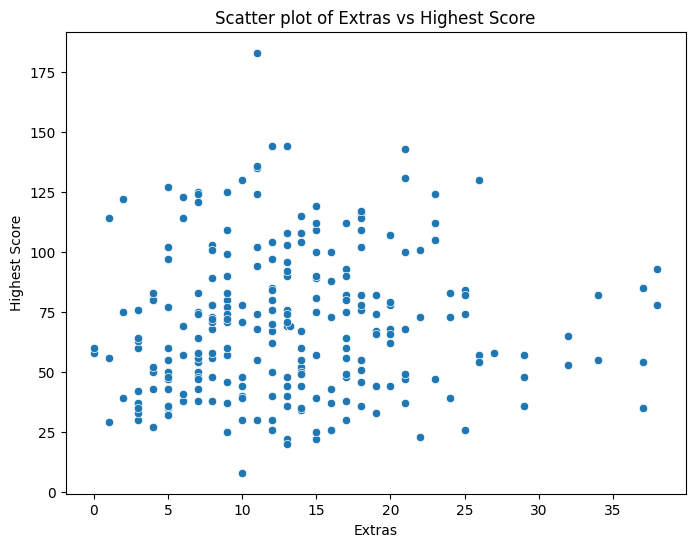

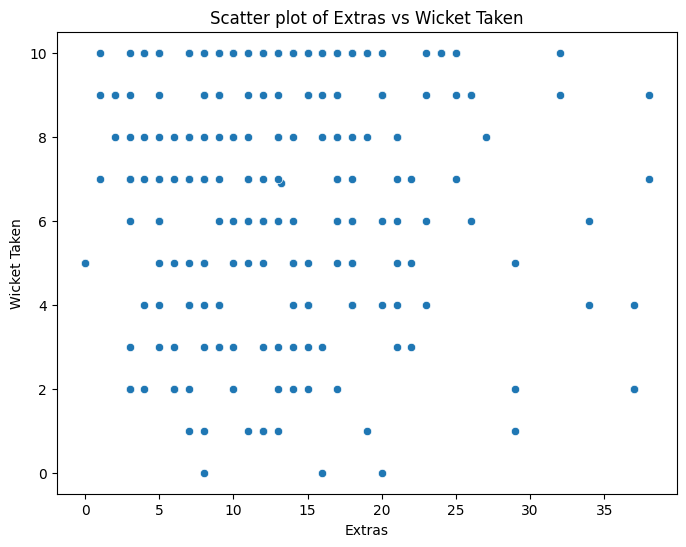

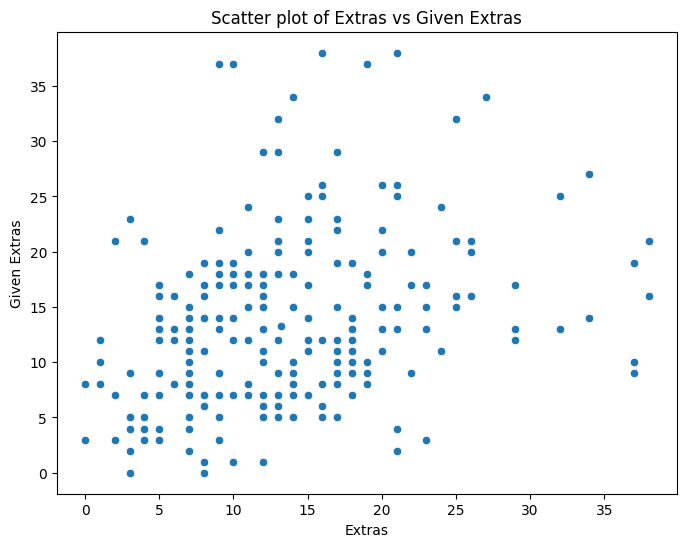

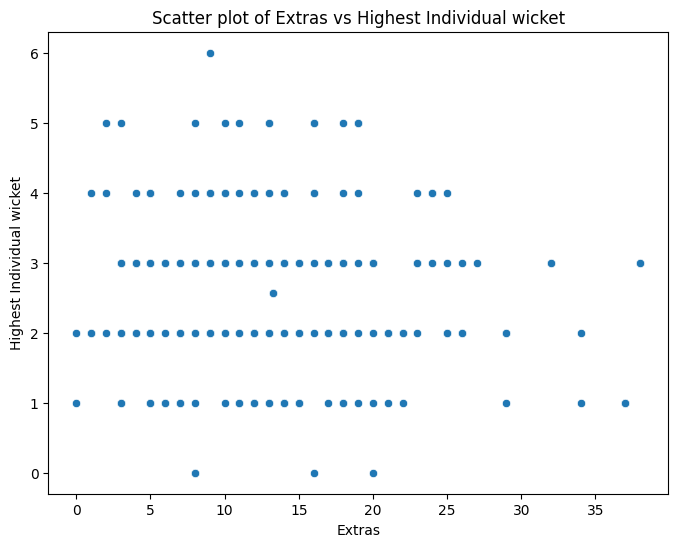

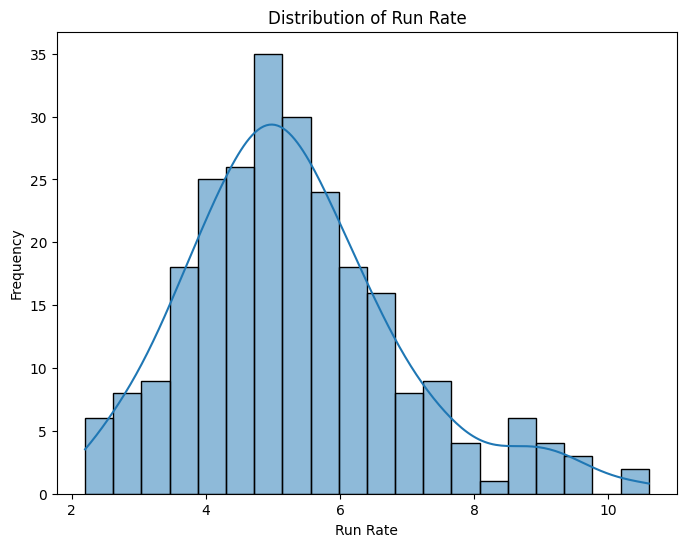

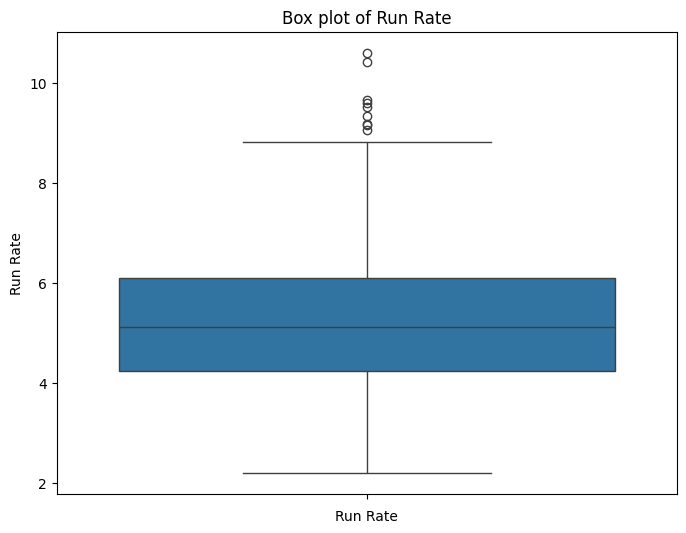

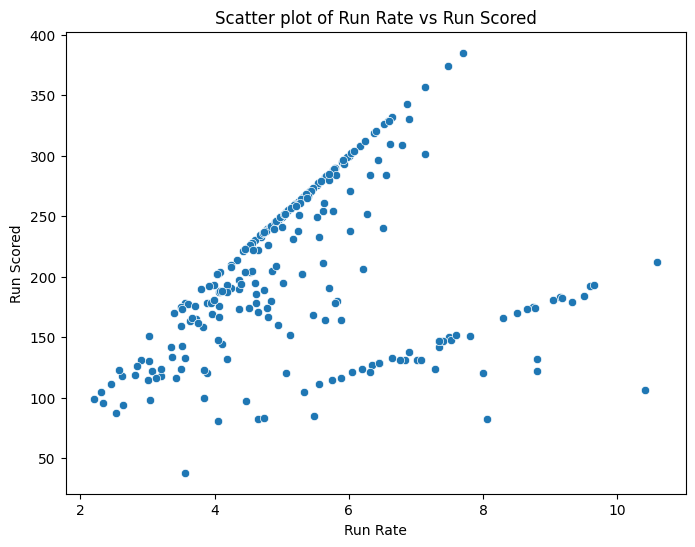

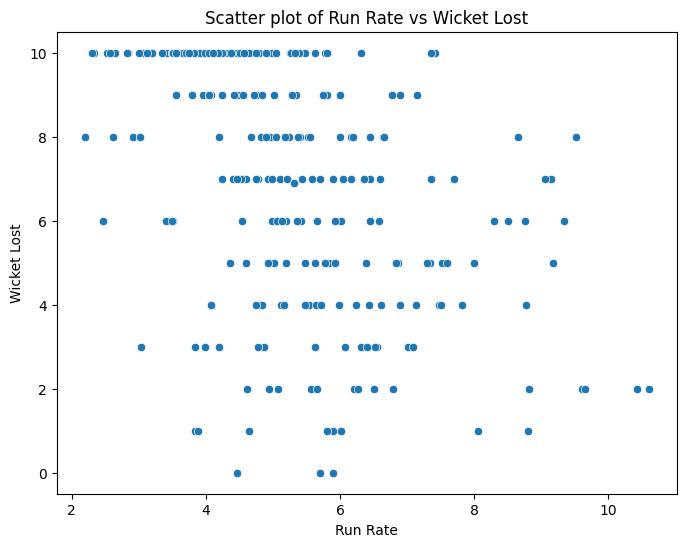

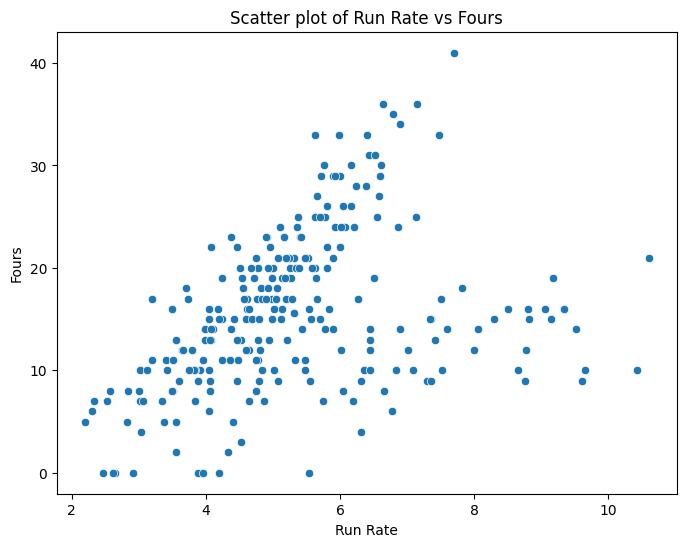

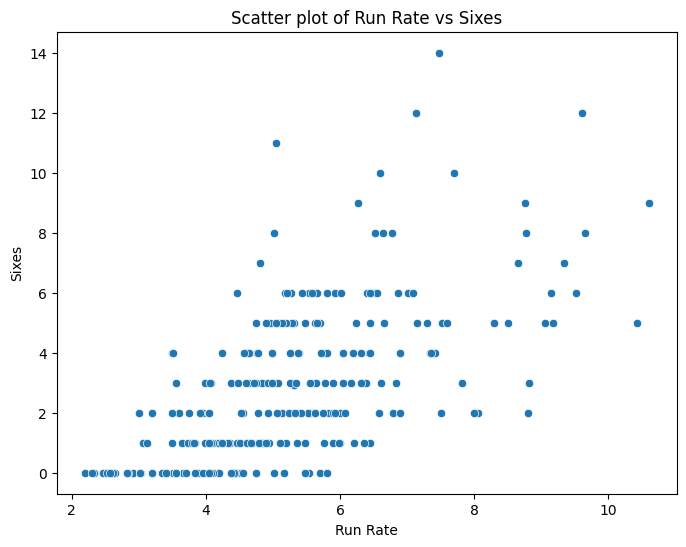

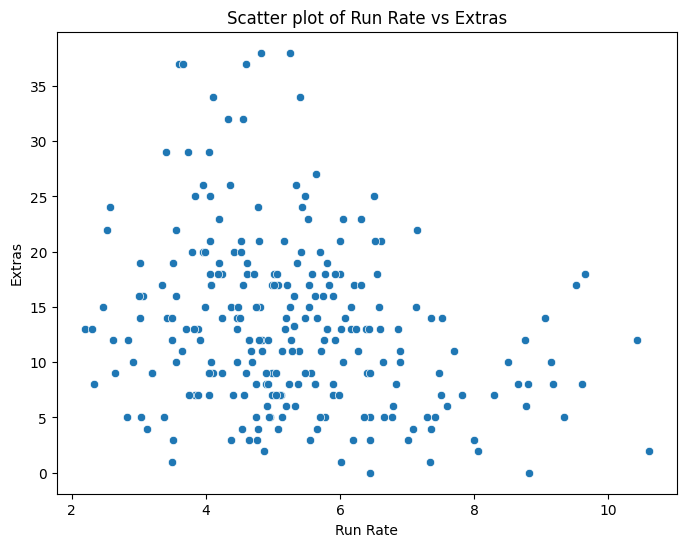

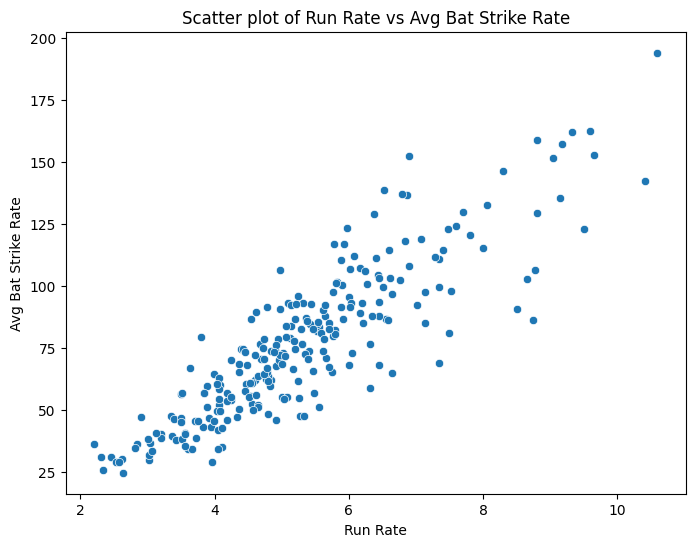

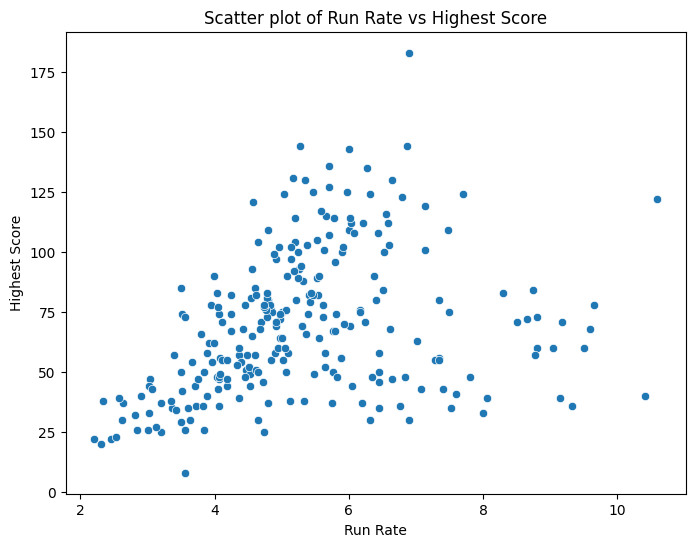

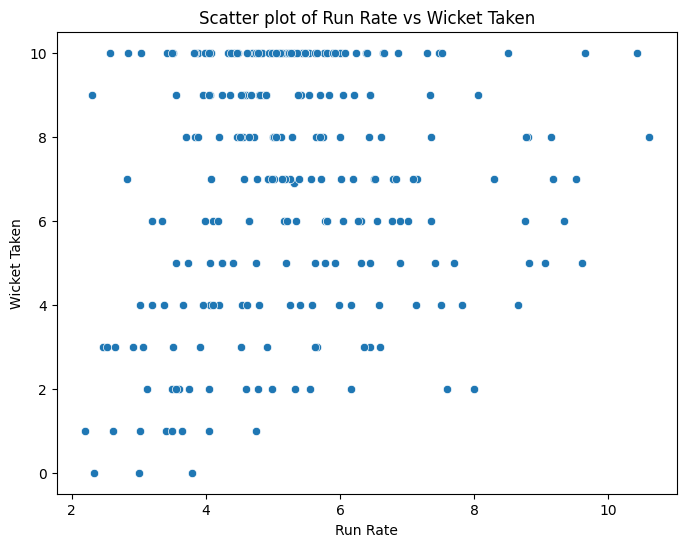

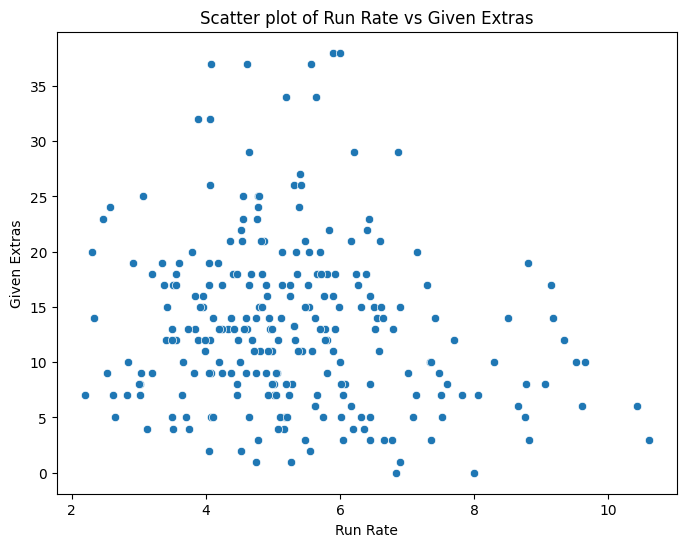

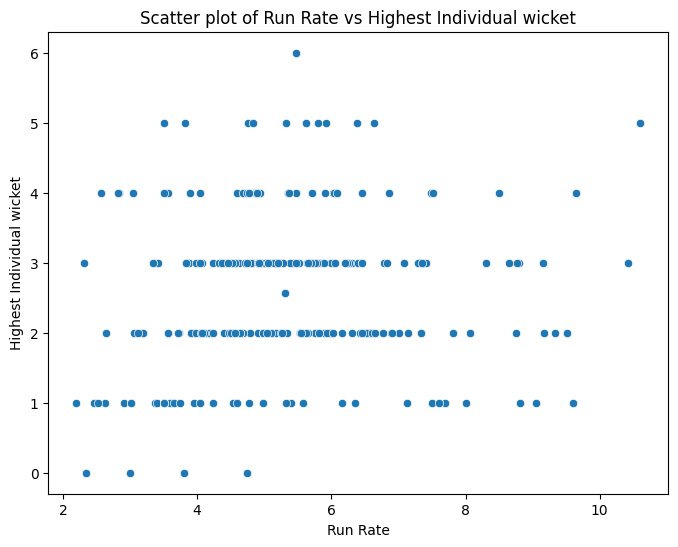

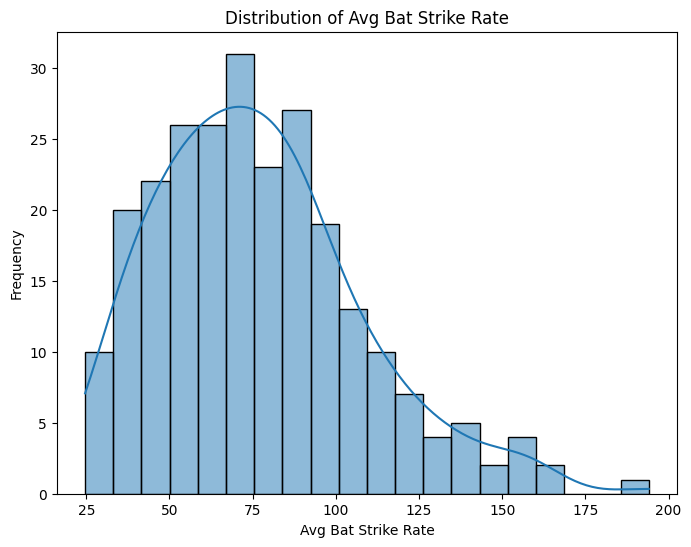

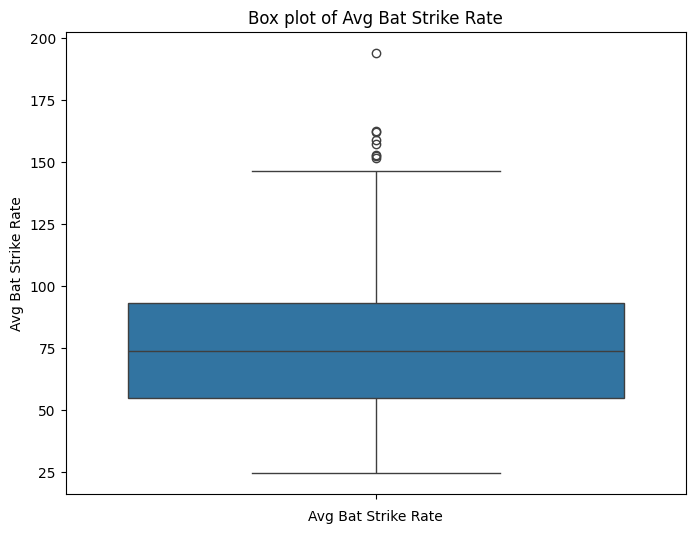

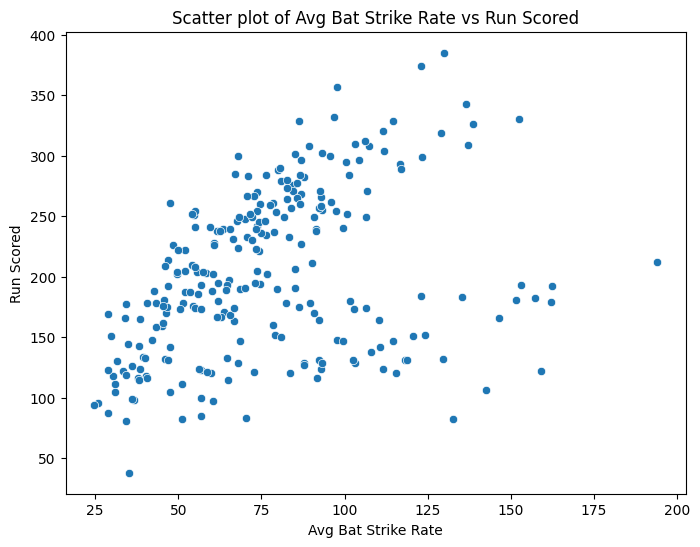

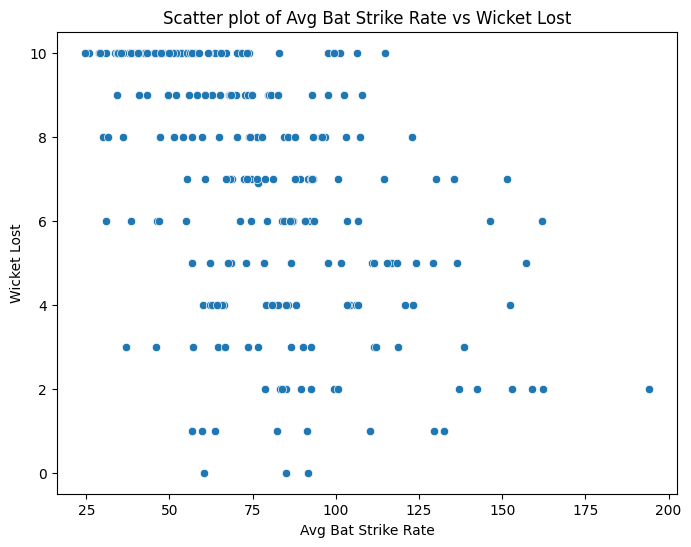

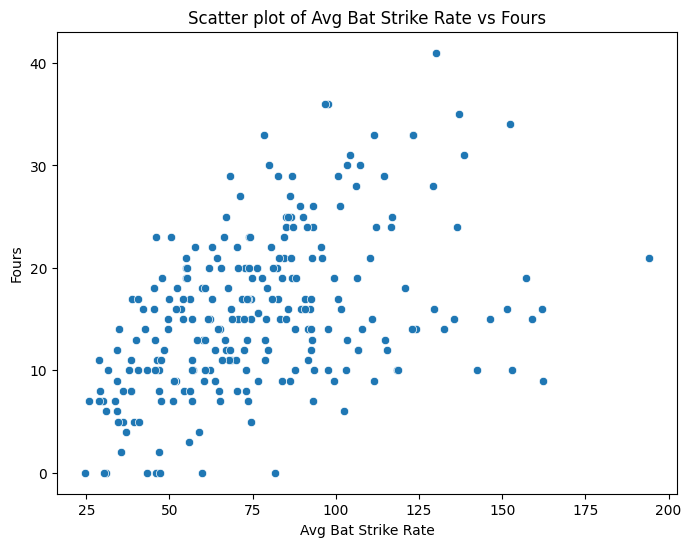

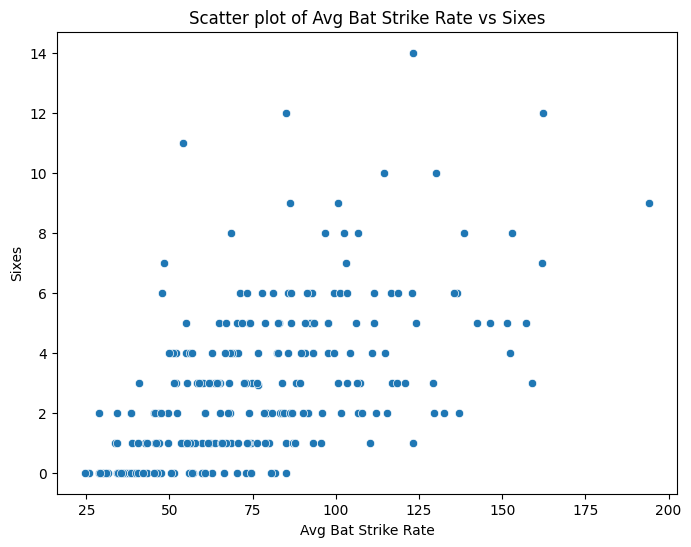

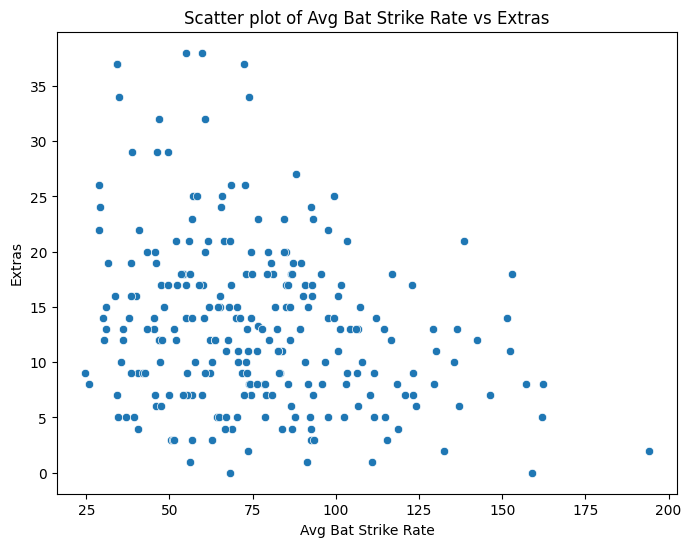

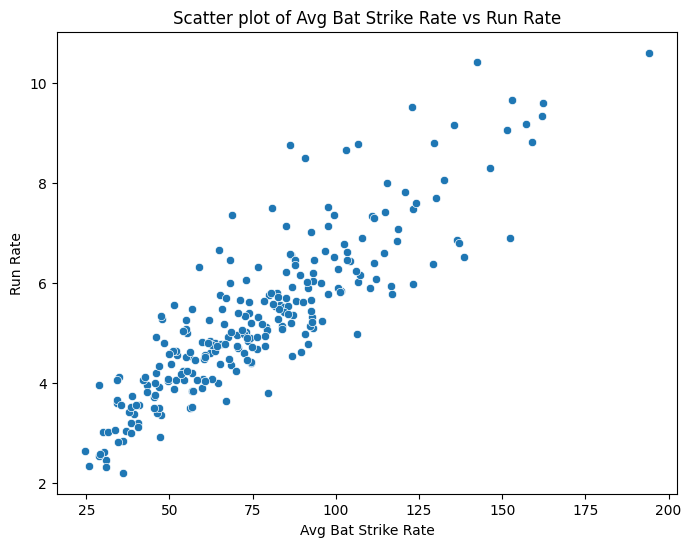

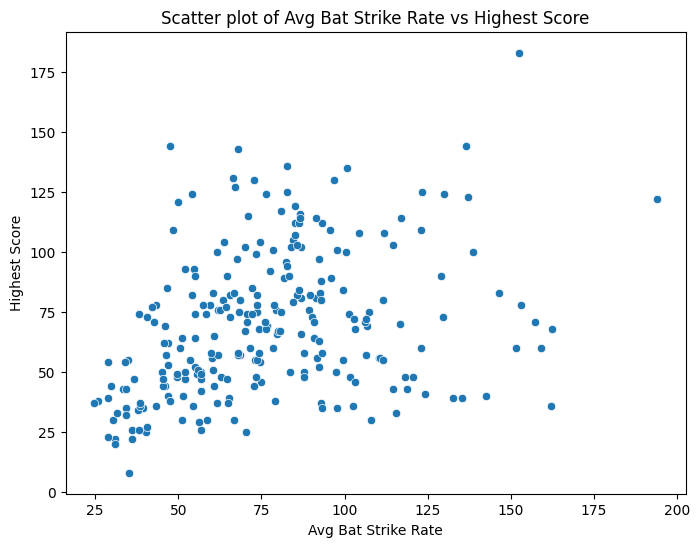

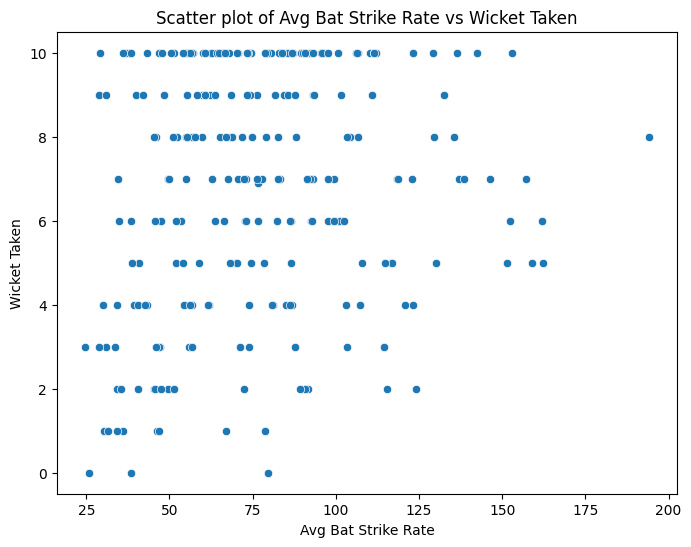

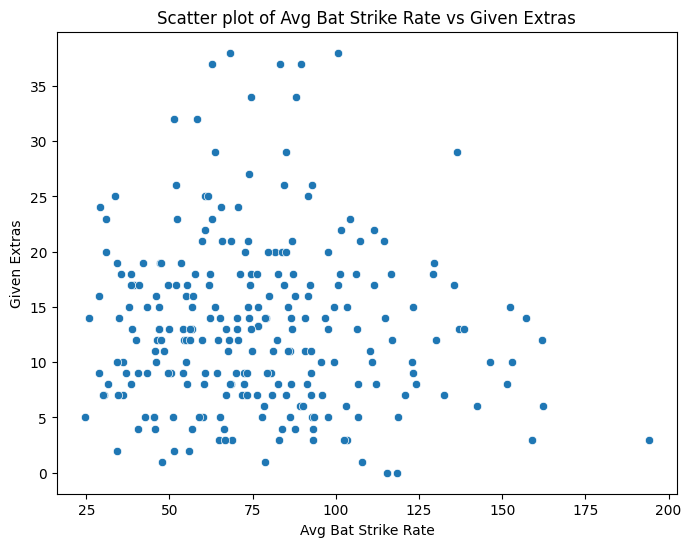

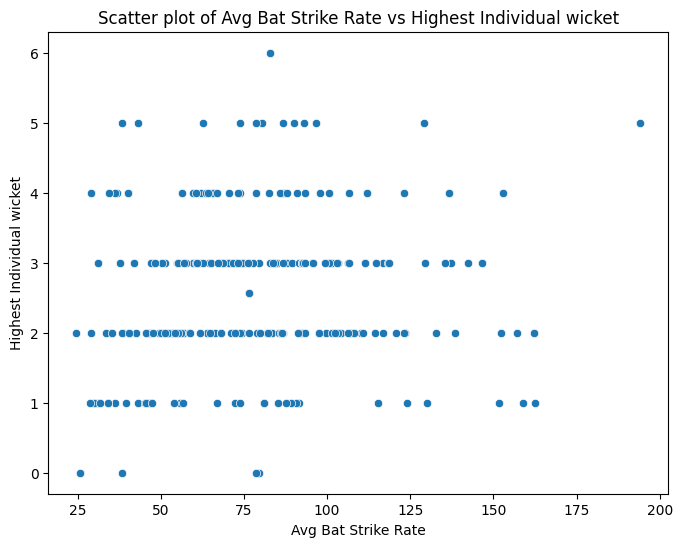

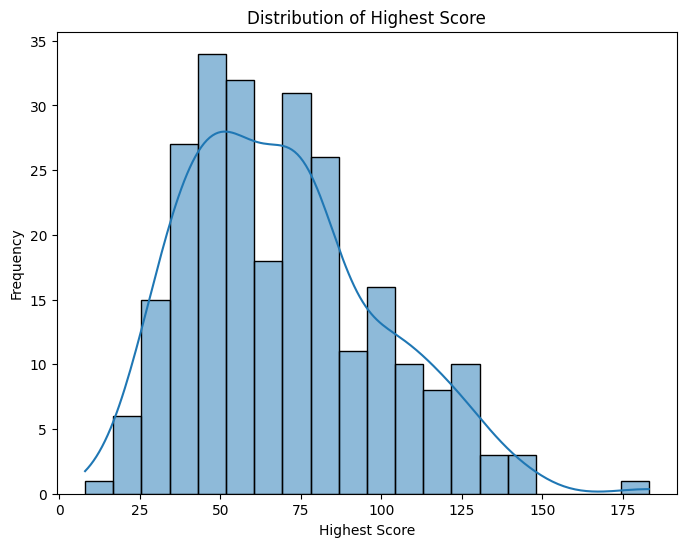

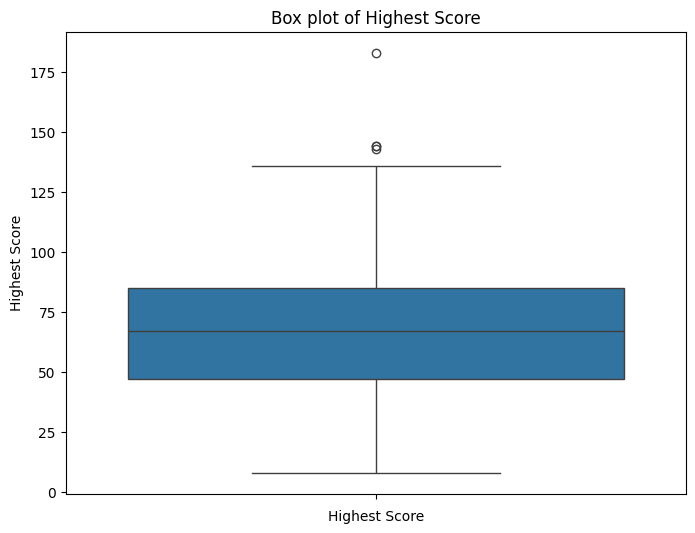

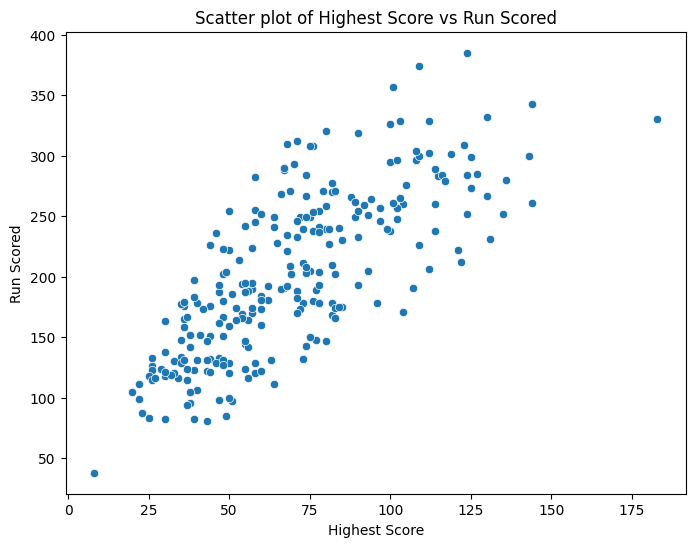

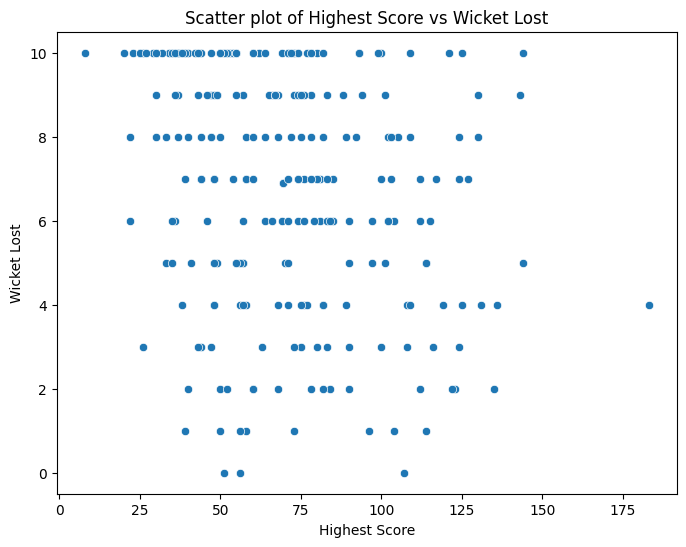

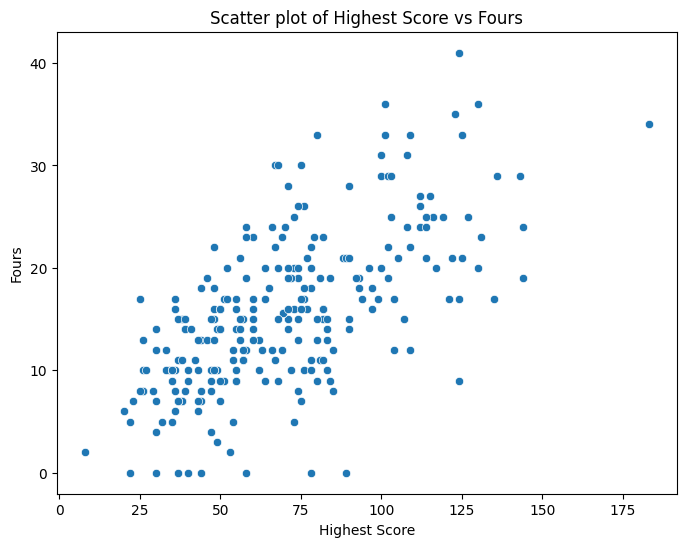

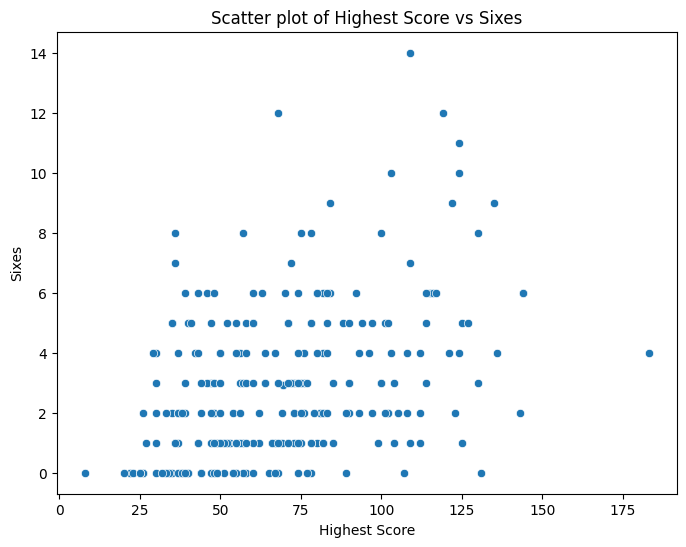

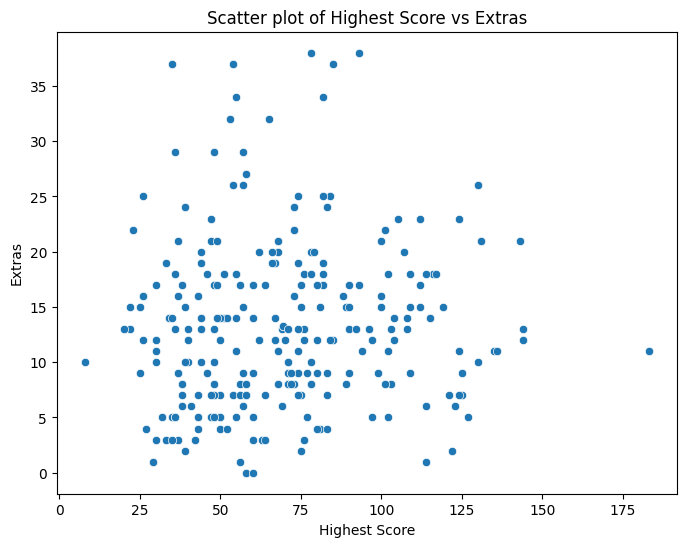

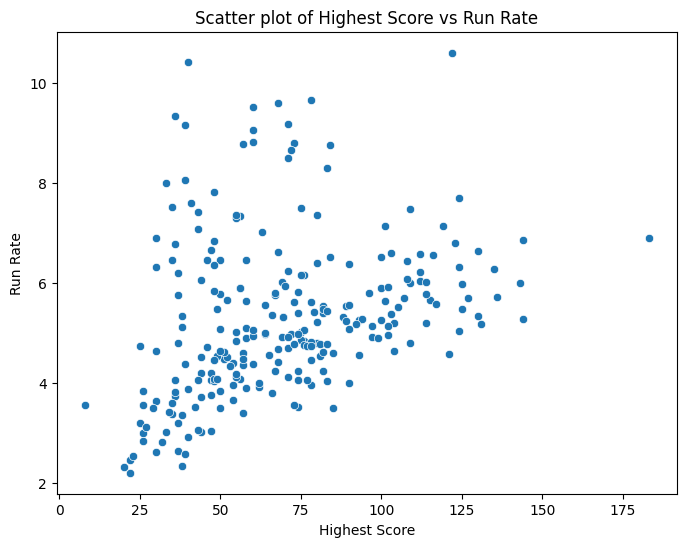

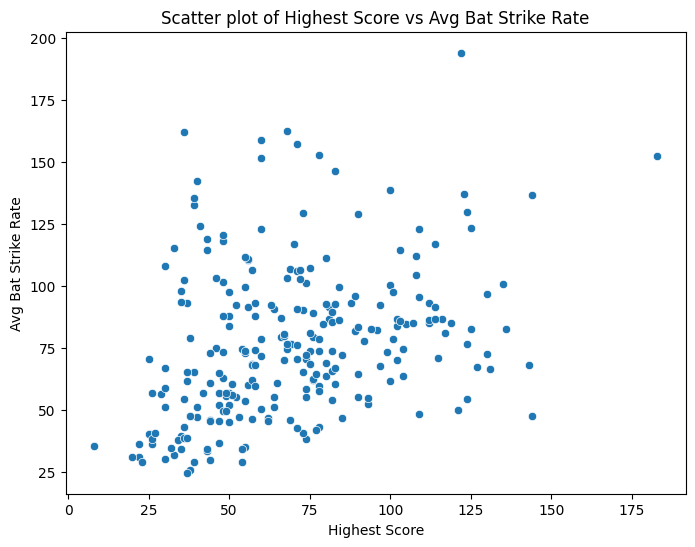

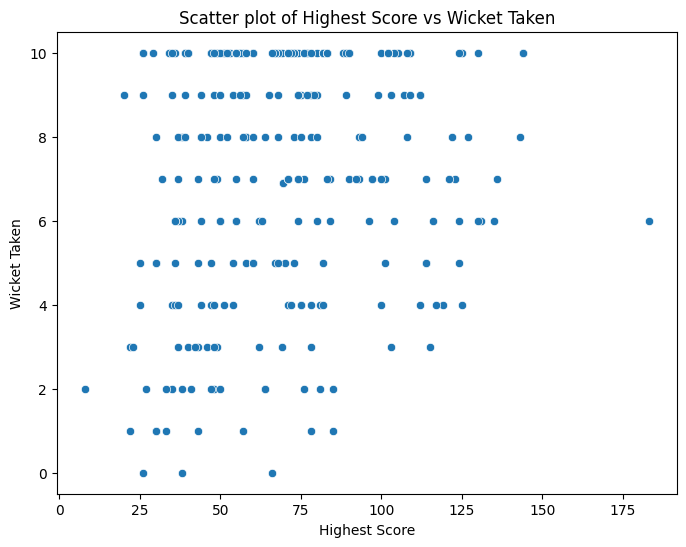

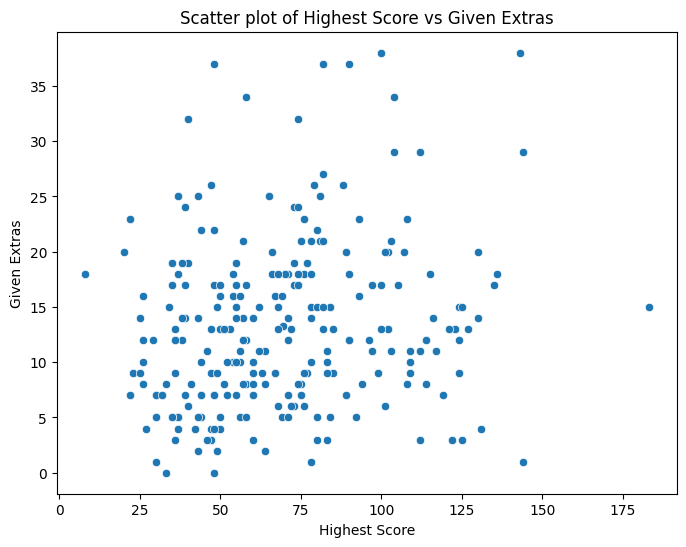

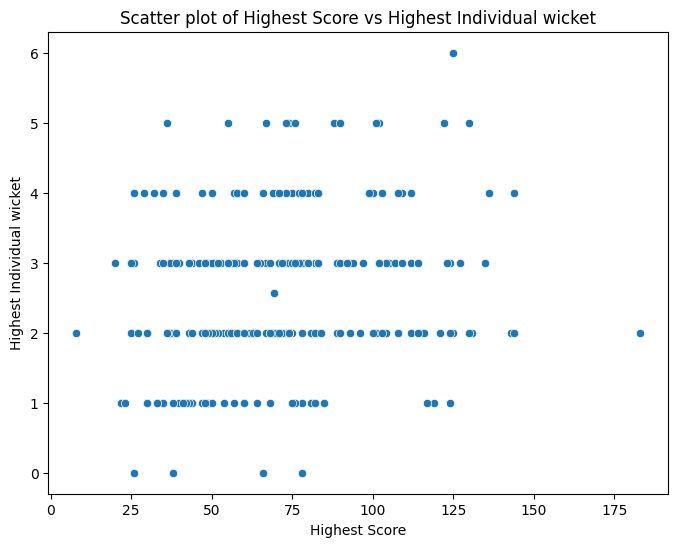

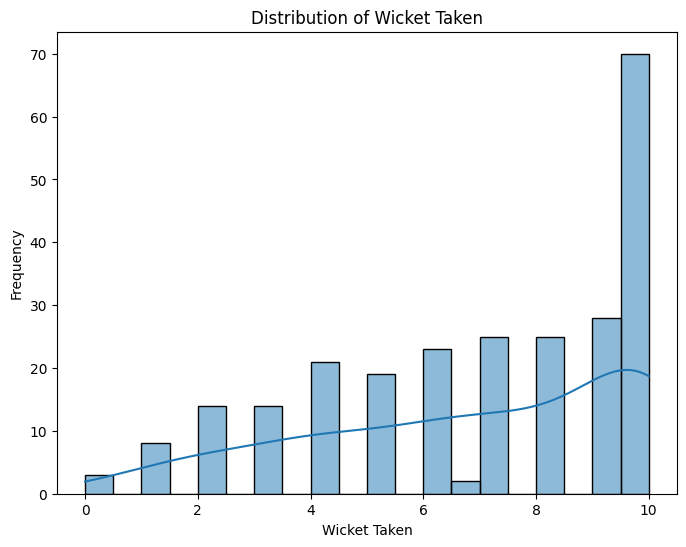

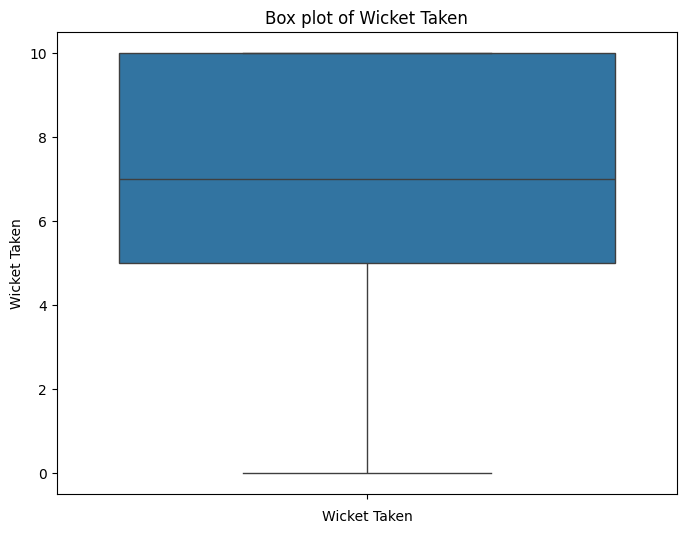

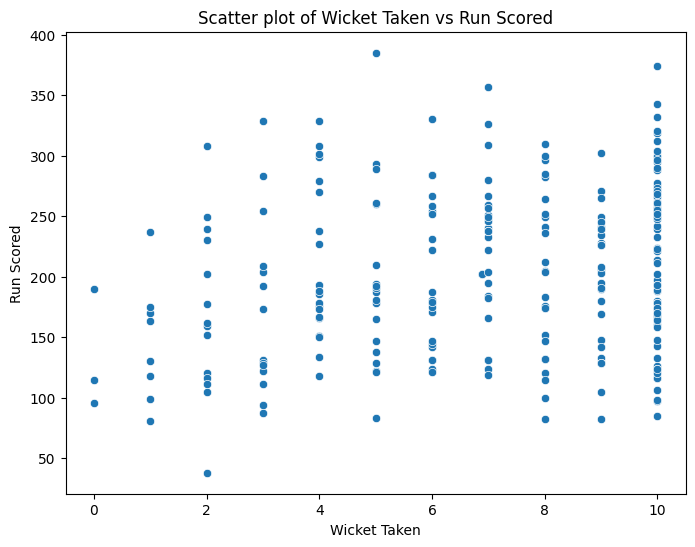

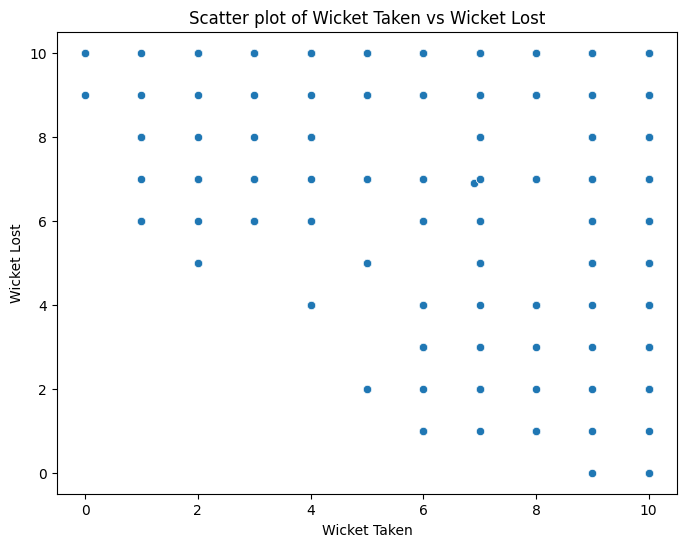

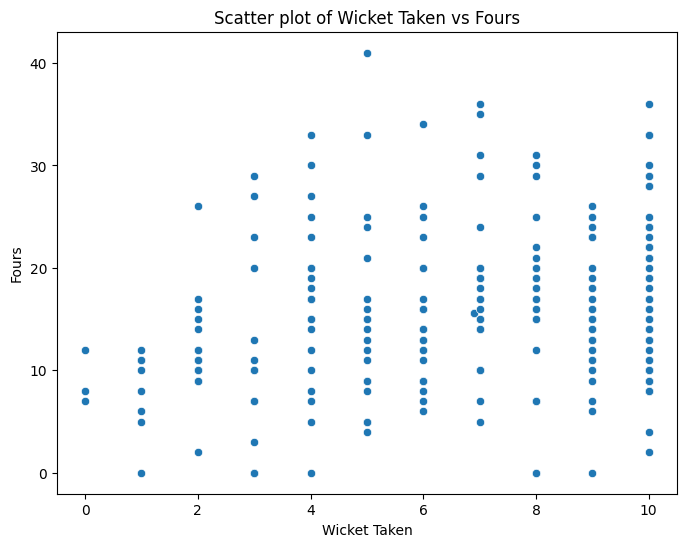

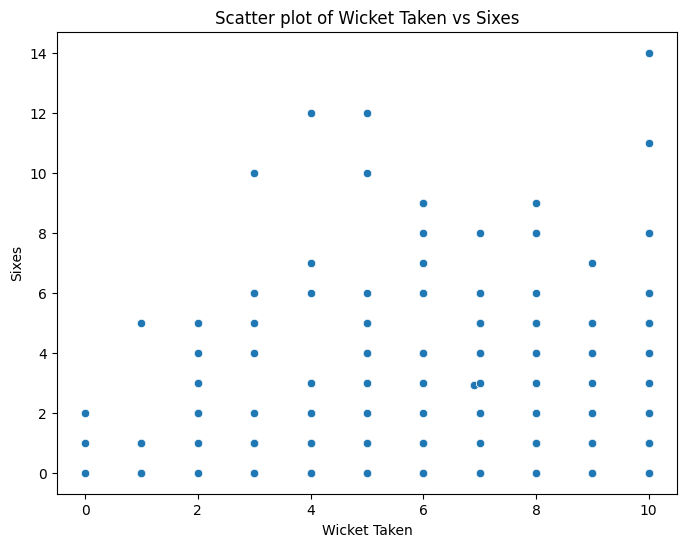

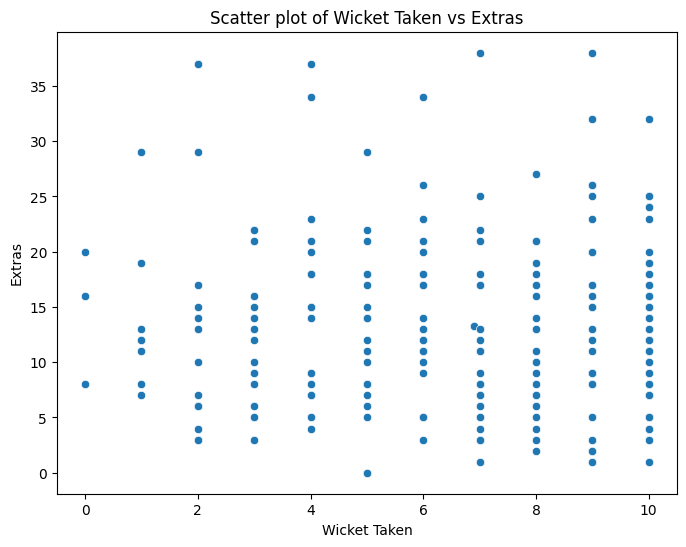

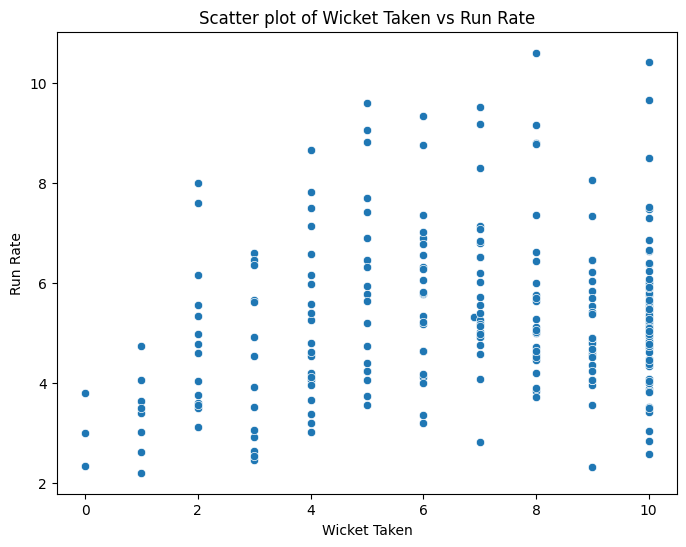

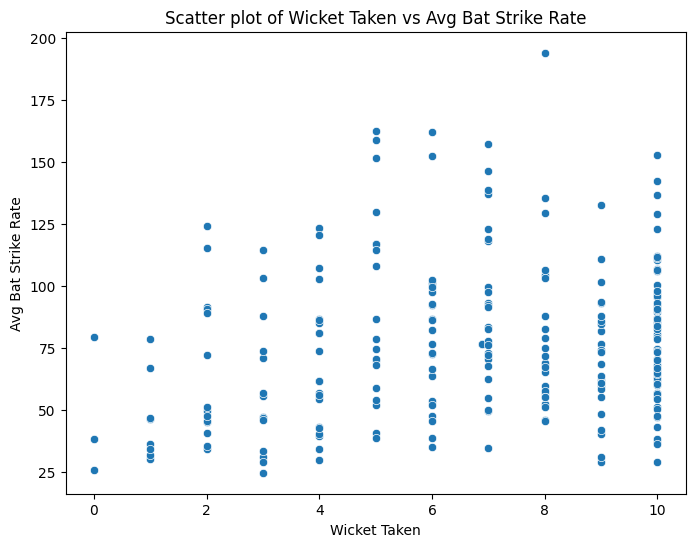

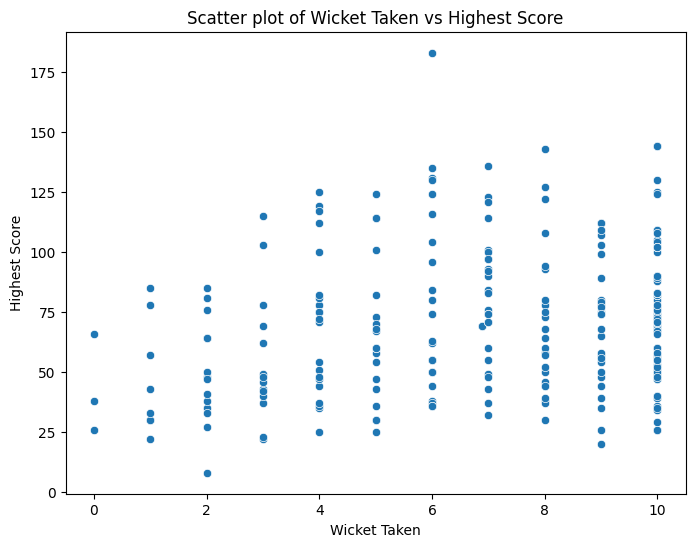

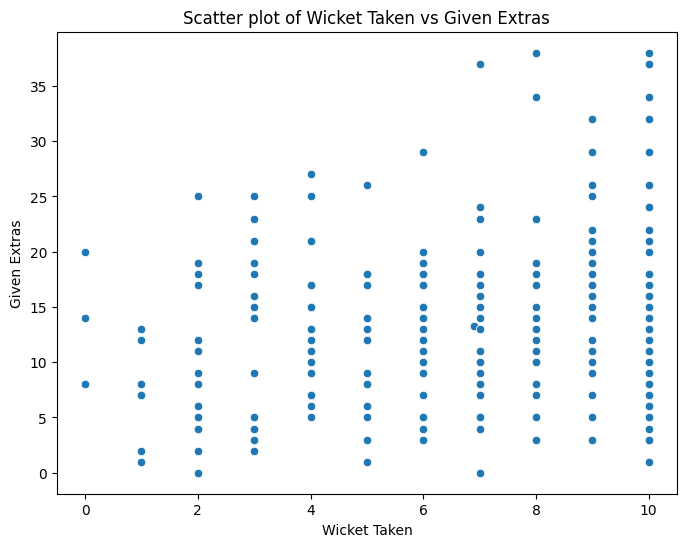

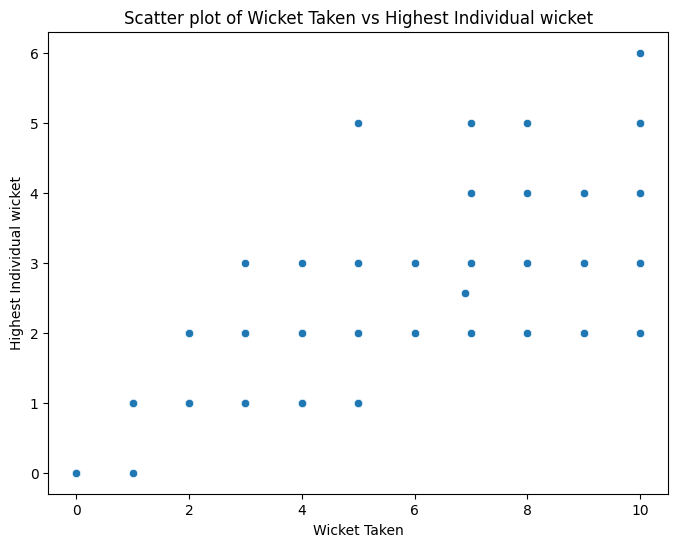

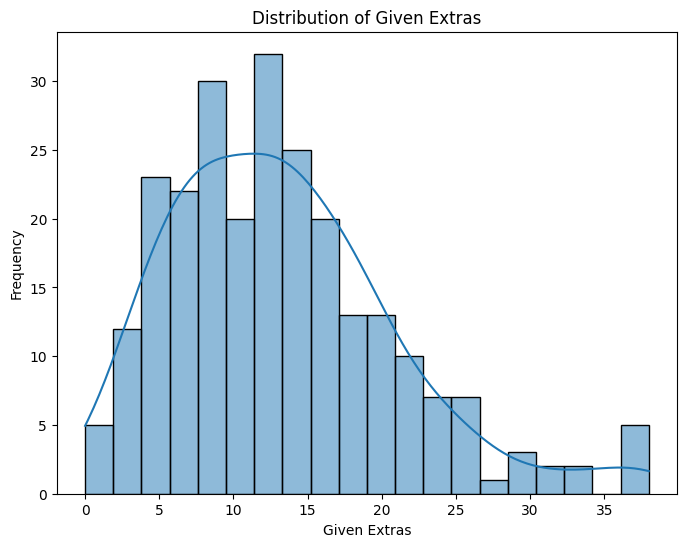

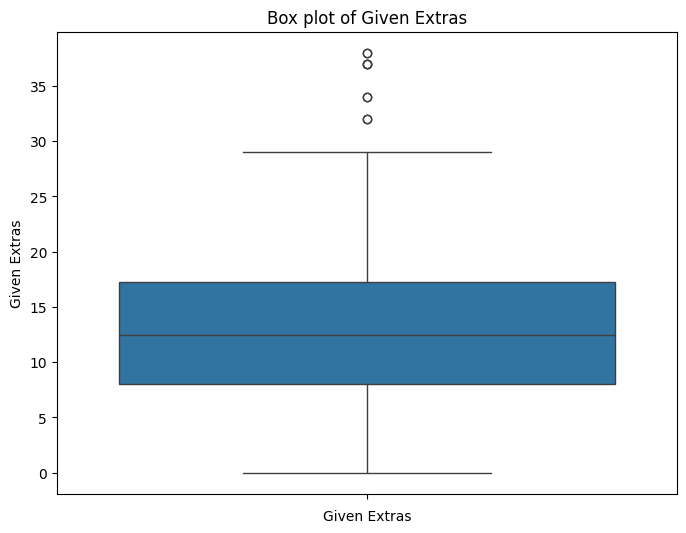

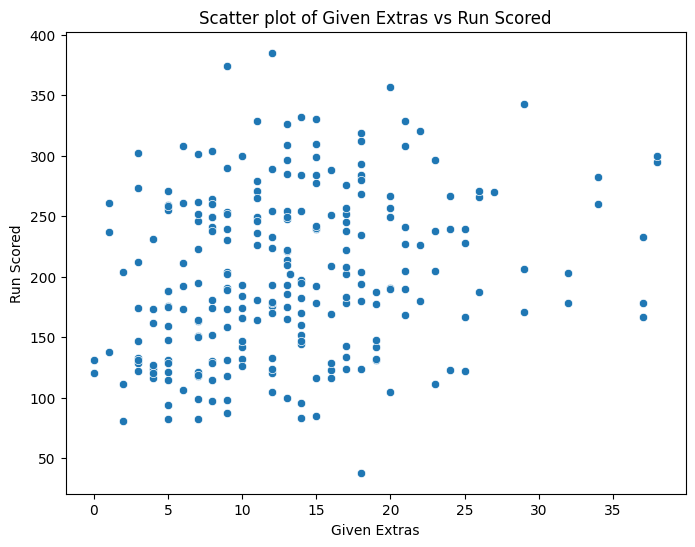

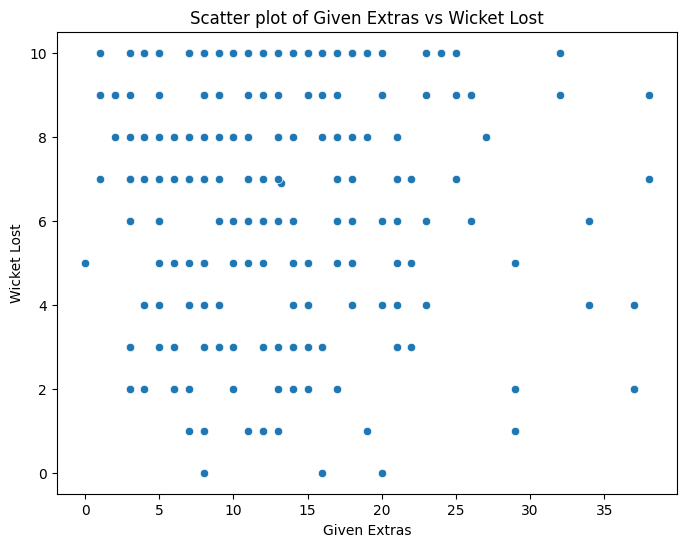

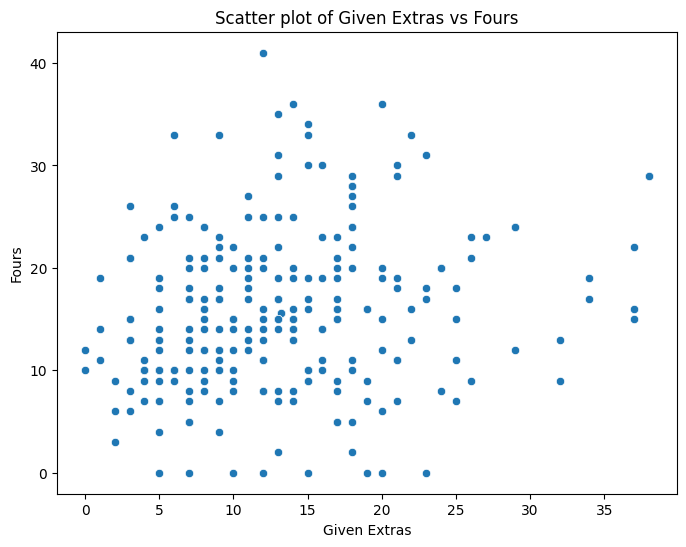

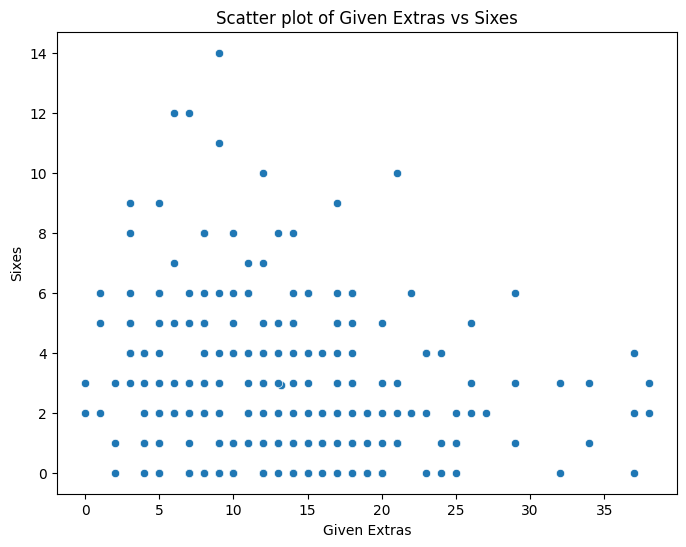

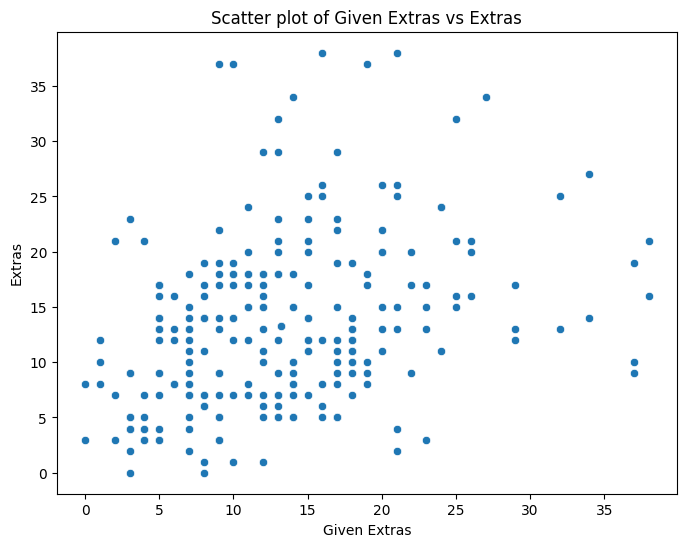

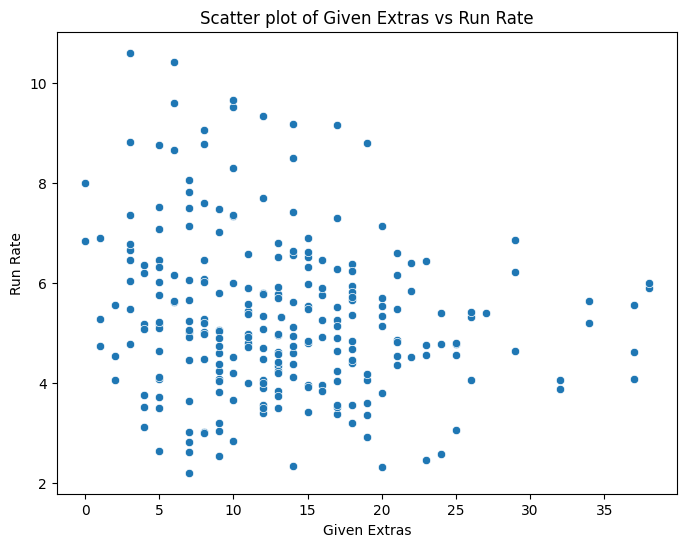

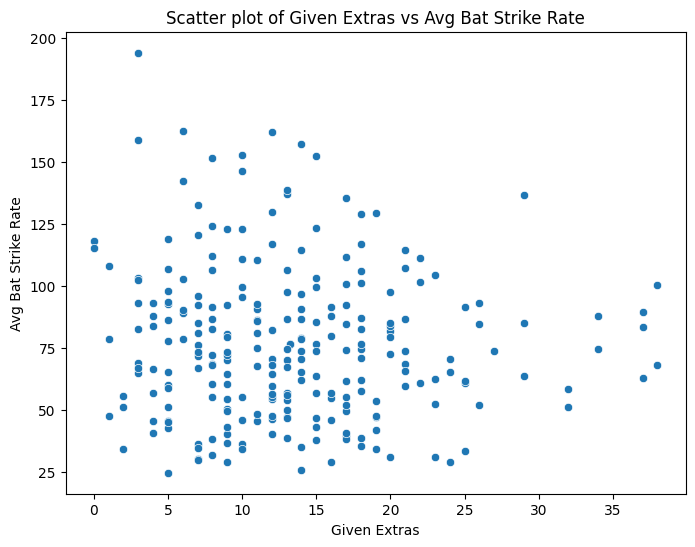

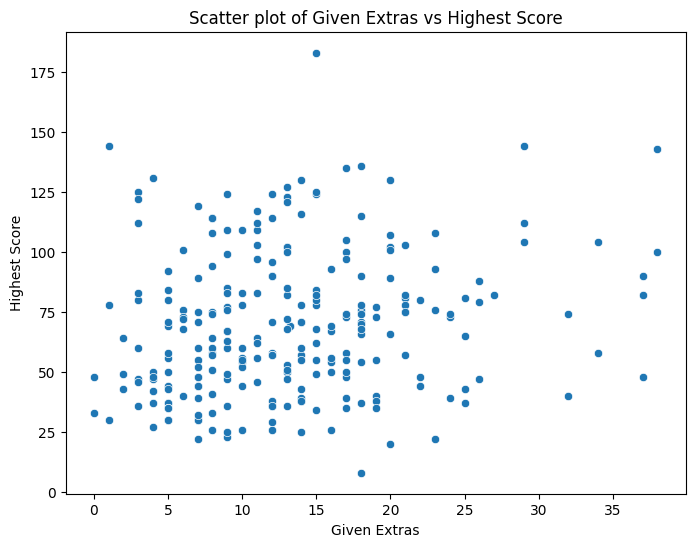

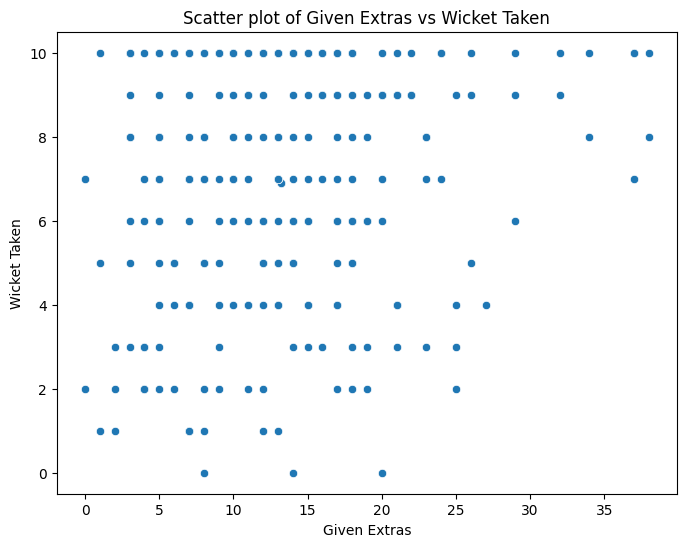

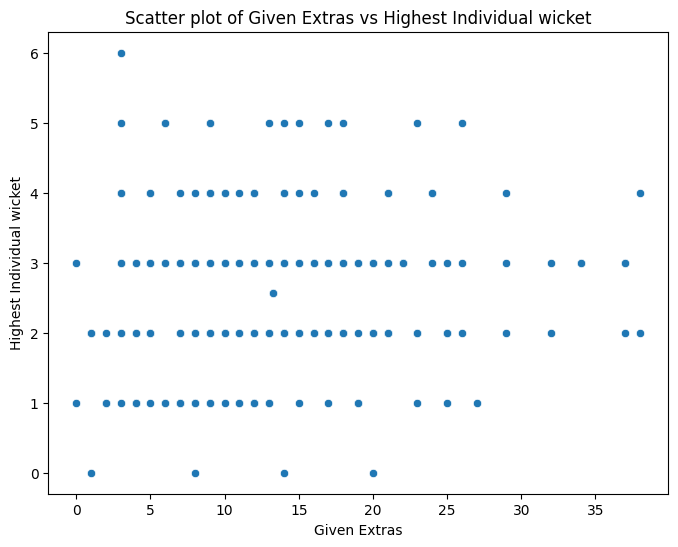

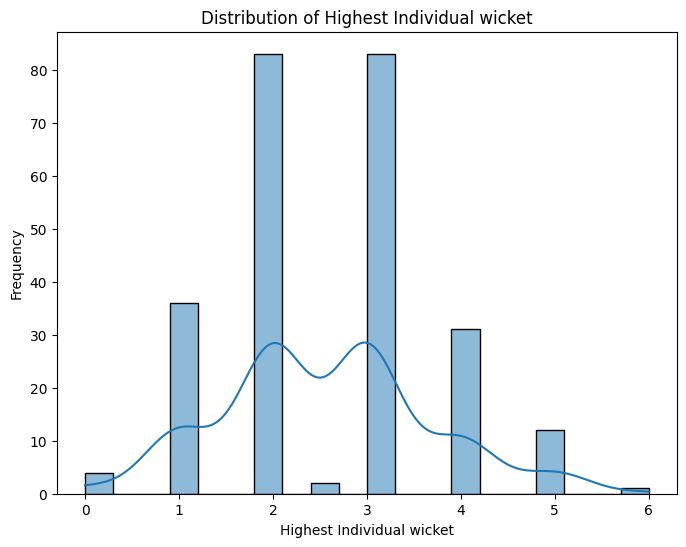

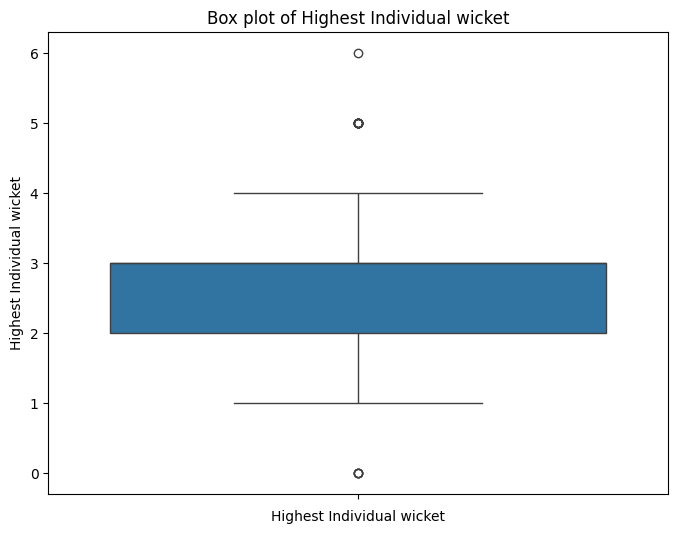

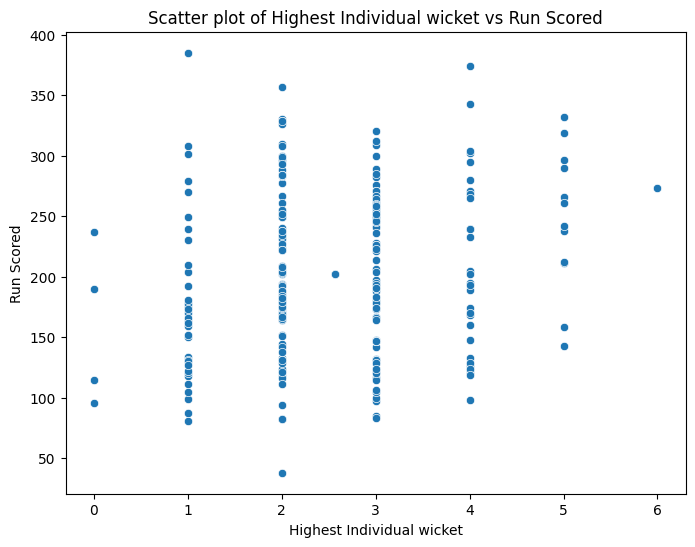

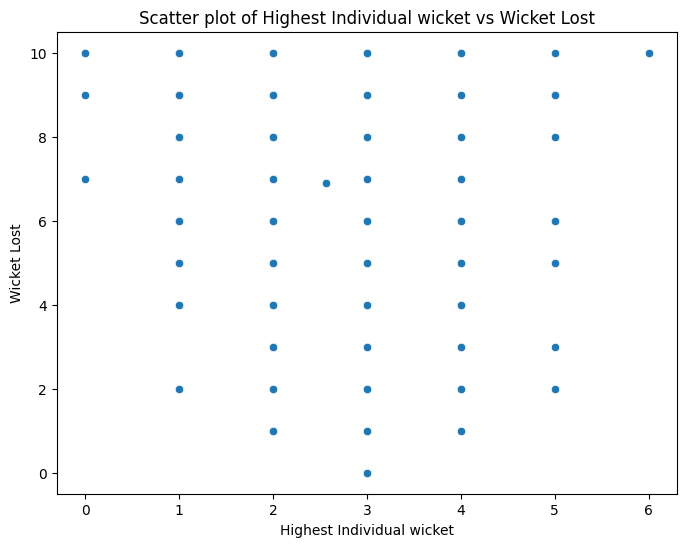

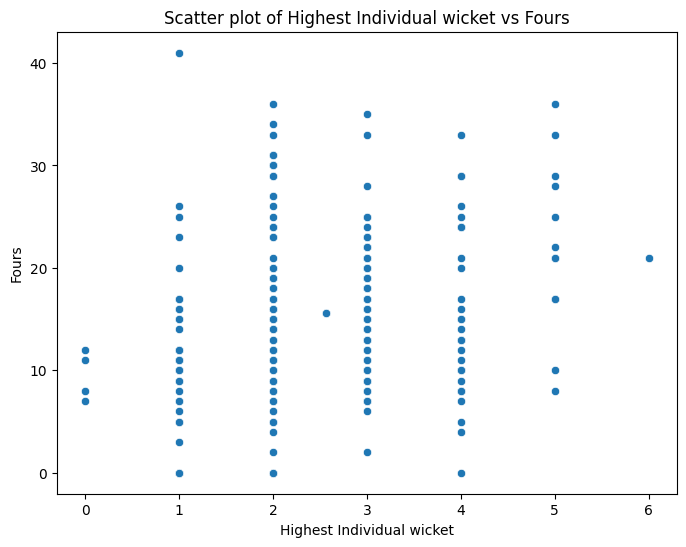

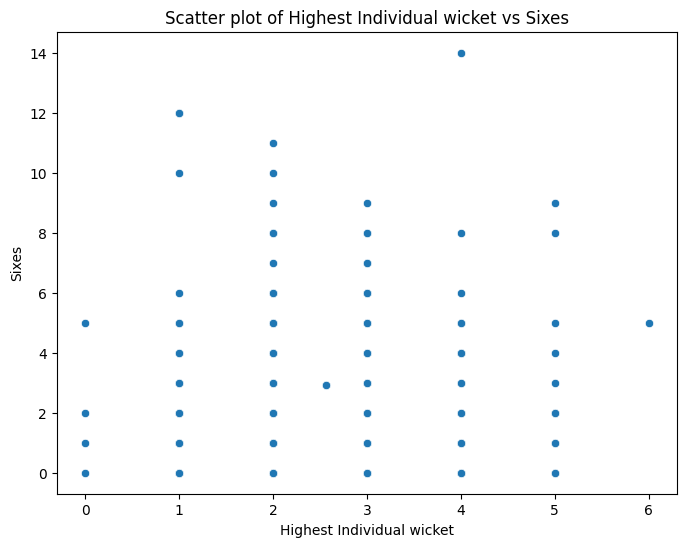

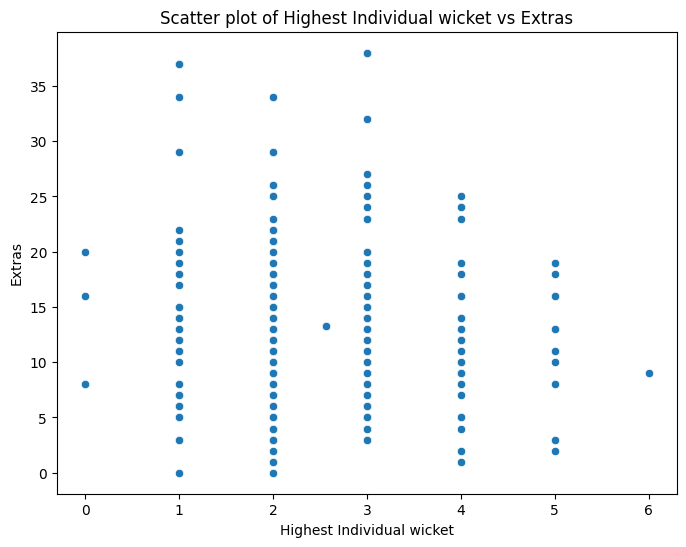

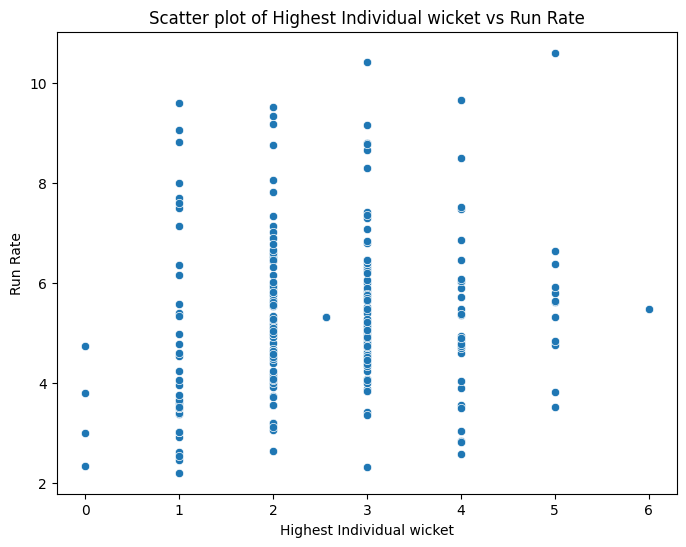

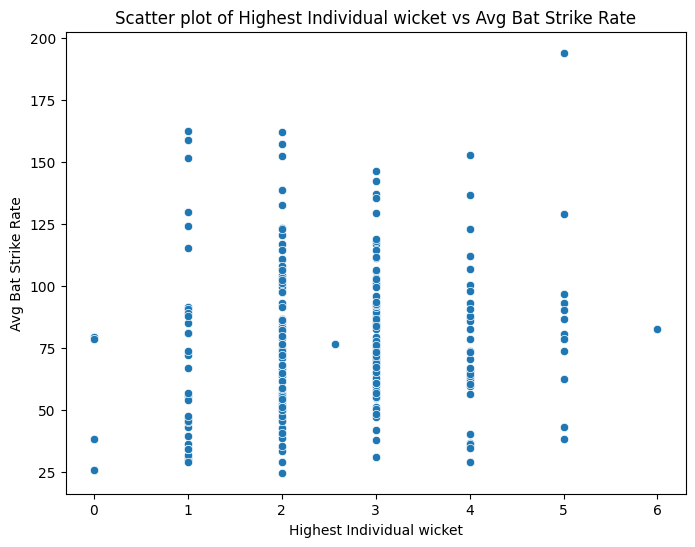

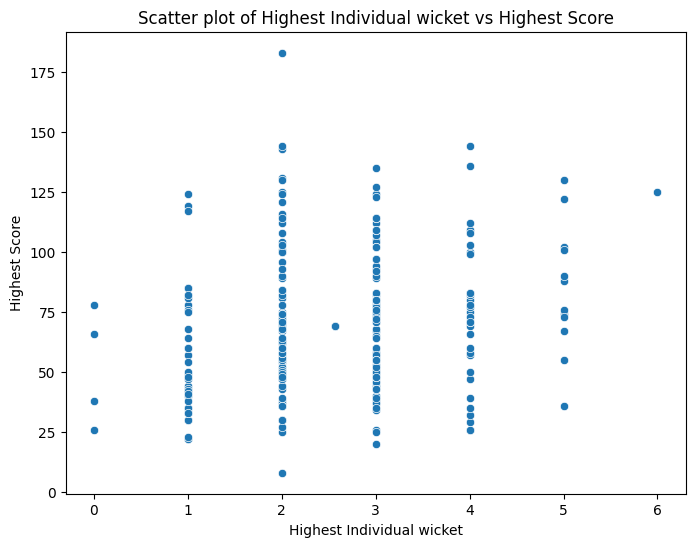

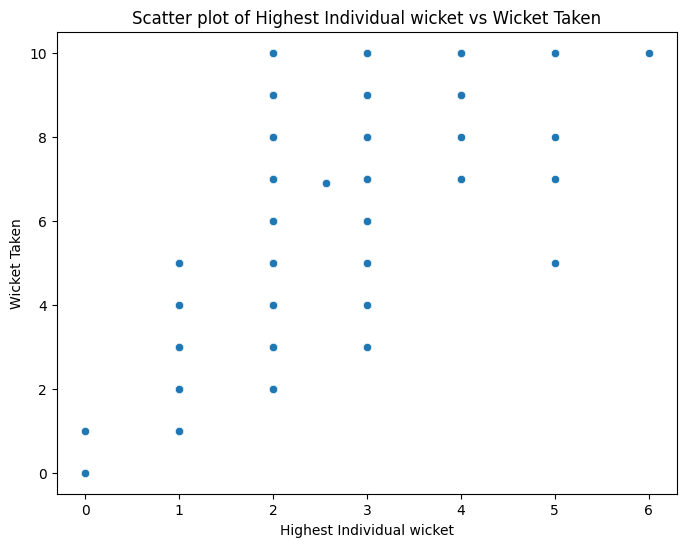

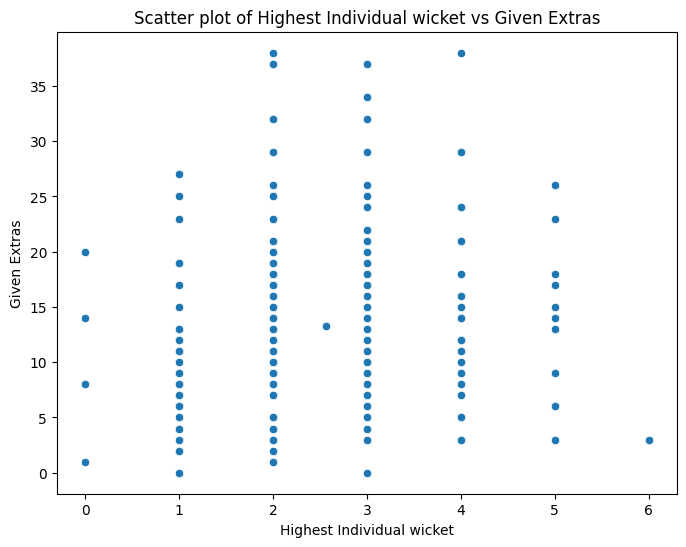

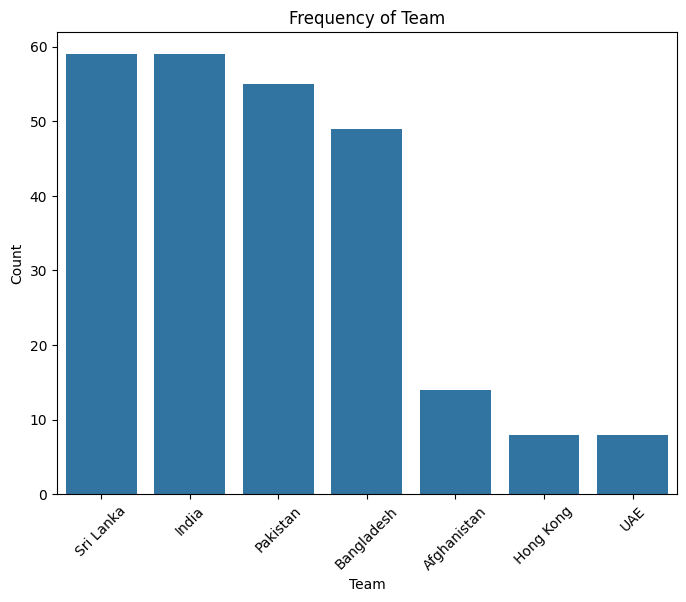

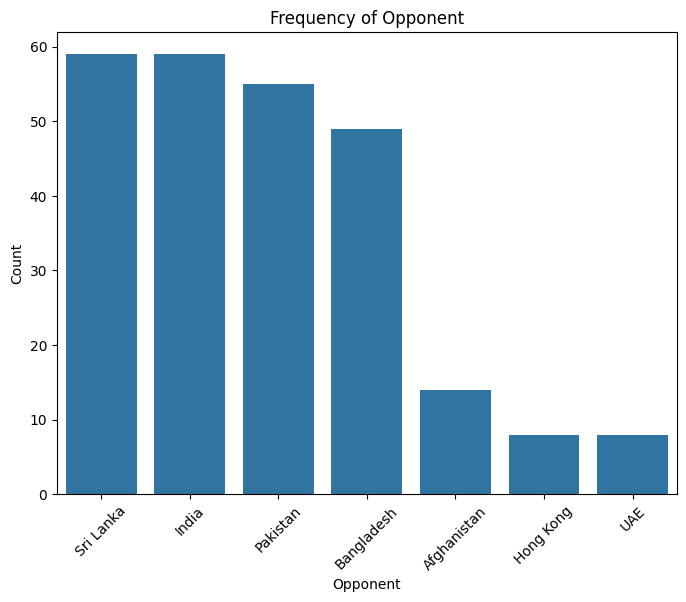

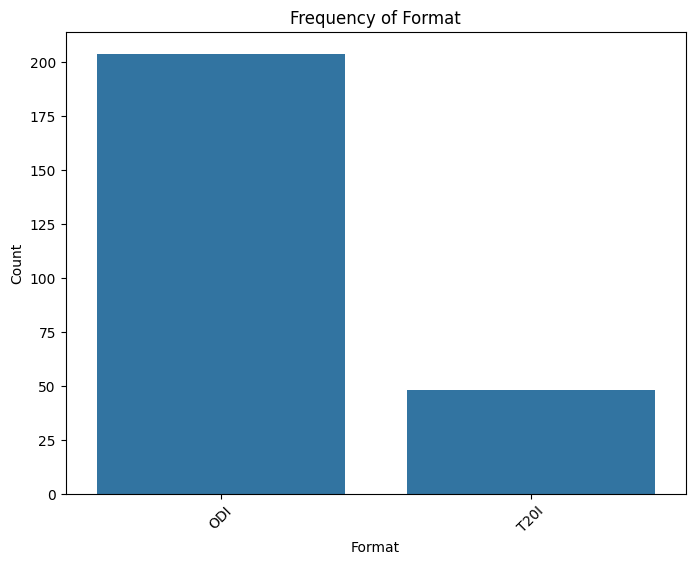

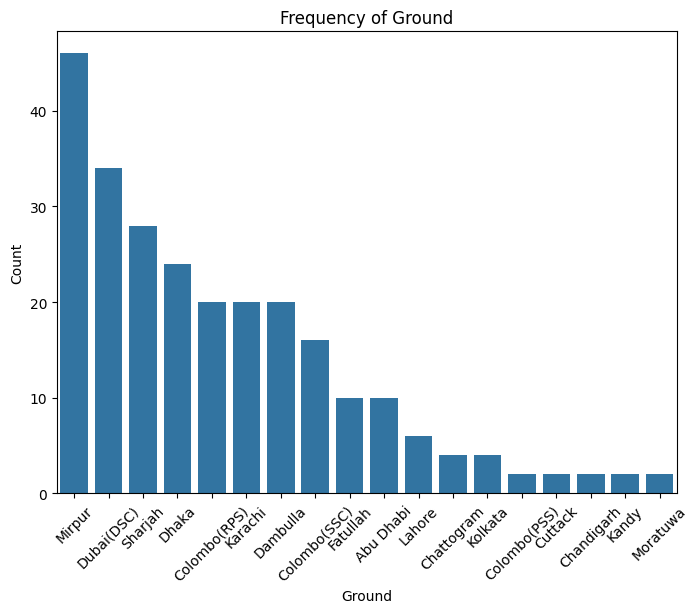

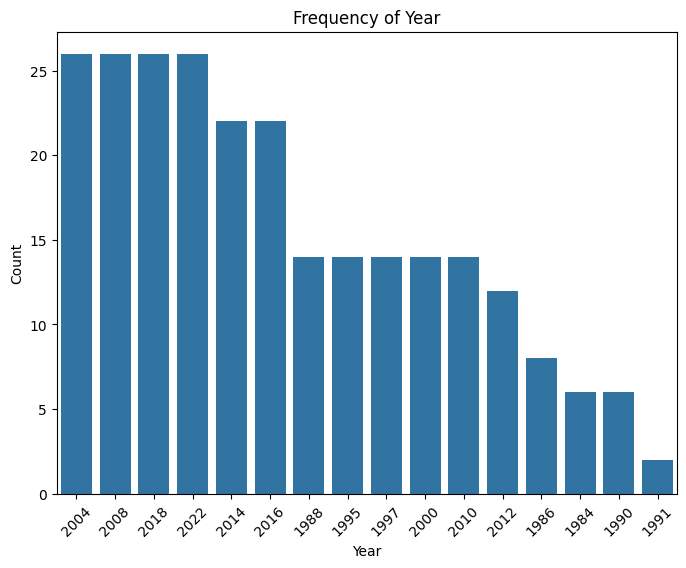

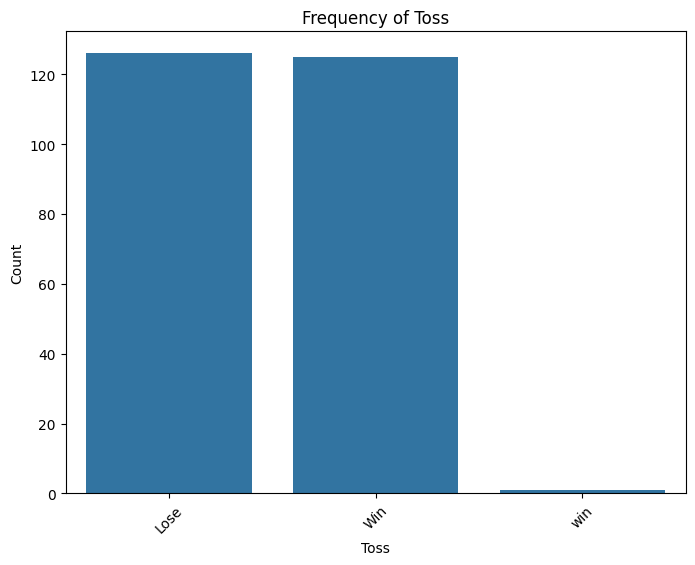

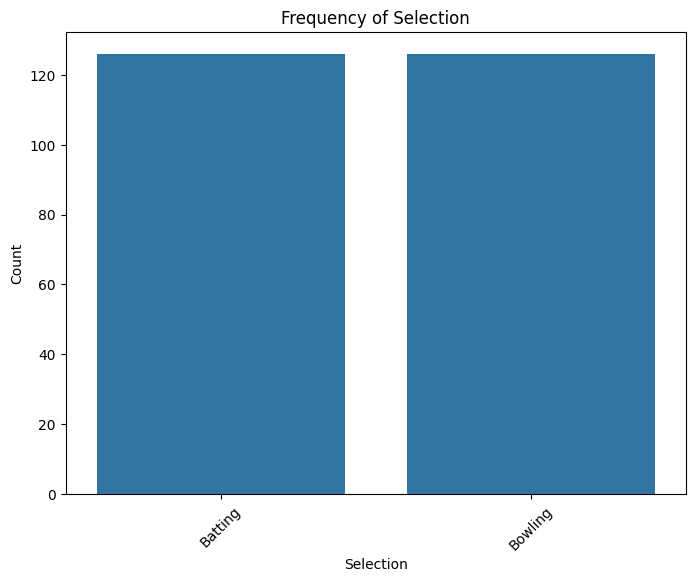

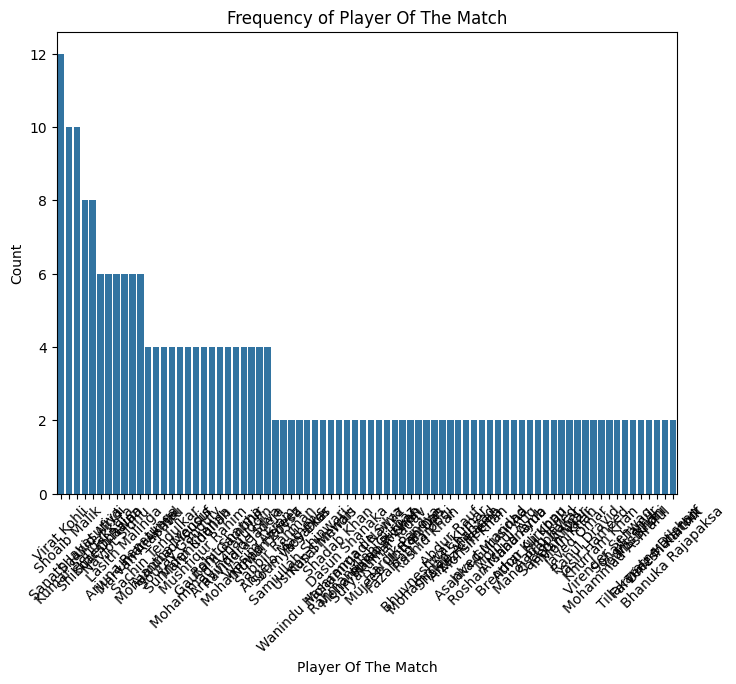

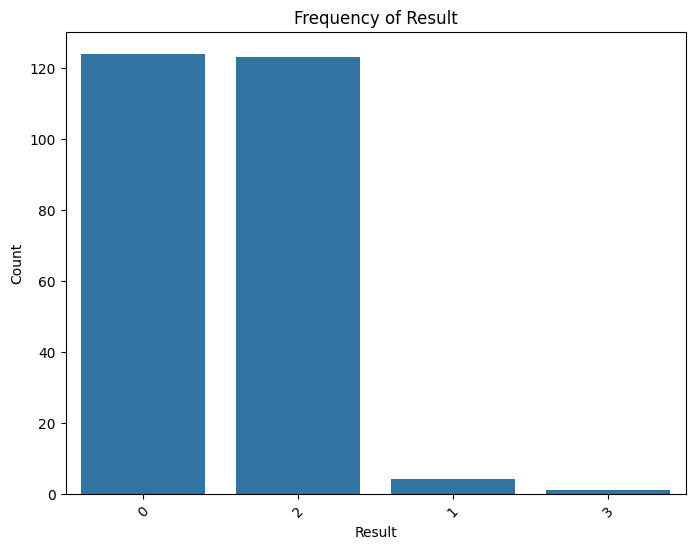

In [115]:
numerical_variables = ['Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
                       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken', 'Given Extras',
                       'Highest Individual wicket']
categorical_variables = ['Team', 'Opponent', 'Format', 'Ground', 'Year', 'Toss', 'Selection',
                         'Player Of The Match', 'Result']

# Plot histograms, box plots, and scatter plots for numerical variables
for col in numerical_variables:
    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

    # Scatter plot with other numerical variables
    for other_col in numerical_variables:
        if other_col != col:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=col, y=other_col, data=df)
            plt.title(f'Scatter plot of {col} vs {other_col}')
            plt.xlabel(col)
            plt.ylabel(other_col)
            plt.show()

# Plot bar plots for categorical variables
for col in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
import pandas as pd

# Assume df is your DataFrame with the provided columns and data types

# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the encoded DataFrame
print(df_encoded.head())


   Year  Run Scored  Wicket Lost  Fours  Sixes  Extras  Run Rate  \
0  1984       187.0          9.0    9.0    3.0    21.0      4.06   
1  1984       190.0          5.0   11.0    1.0    26.0      4.36   
2  1984        97.0          0.0    9.0    0.0    14.0      4.47   
3  1984        96.0         10.0    7.0    0.0     8.0      2.34   
4  1984       188.0          4.0   13.0    3.0    17.0      4.08   

   Avg Bat Strike Rate  Highest Score  Wicket Taken  ...  \
0                52.04           47.0           5.0  ...   
1                68.51           57.0           9.0  ...   
2                60.48           51.0          10.0  ...   
3                25.74           38.0           0.0  ...   
4                60.21           56.0          10.0  ...   

   Player Of The Match_Suryakumar Yadav  \
0                                 False   
1                                 False   
2                                 False   
3                                 False   
4              

In [12]:
df_encoded.head()

Year  Run Scored  Wicket Lost  Fours  Sixes  Extras  Run Rate  \
0  1984       187.0          9.0    9.0    3.0    21.0      4.06   
1  1984       190.0          5.0   11.0    1.0    26.0      4.36   
2  1984        97.0          0.0    9.0    0.0    14.0      4.47   
3  1984        96.0         10.0    7.0    0.0     8.0      2.34   
4  1984       188.0          4.0   13.0    3.0    17.0      4.08   

   Avg Bat Strike Rate  Highest Score  Wicket Taken  ...  \
0                52.04           47.0           5.0  ...   
1                68.51           57.0           9.0  ...   
2                60.48           51.0          10.0  ...   
3                25.74           38.0           0.0  ...   
4                60.21           56.0          10.0  ...   

   Player Of The Match_Suryakumar Yadav  \
0                                 False   
1                                 False   
2                                 False   
3                                 False   
4                                 False   

   Player Of The Match_Tillakaratne Dilshan  Player Of The Match_Umar Akmal  \
0                                     False                           False   
1                                     False                           False   
2                                     False                           False   
3                                     False                           False   
4                                     False                           False   

   Player Of The Match_Usman Shinwari  Player Of The Match_Virat Kohli  \
0                               False                            False   
1                               False                            False   
2                               False                            False   
3                               False                            False   
4                               False                            False   

   Player Of The Match_Virender Sehwag  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   

   Player Of The Match_Wanindu Hasaranga de Silva  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Player Of The Match_Wasim Akram  Player Of The Match_Yasir Hameed  \
0                            False                             False   
1                            False                             False   
2                            False                             False   
3                            False                             False   
4                            False                             False   

   Player Of The Match_Younis Khan  
0                            False  
1                            False  
2                            False  
3                            False  
4                            False  

[5 rows x 123 columns]

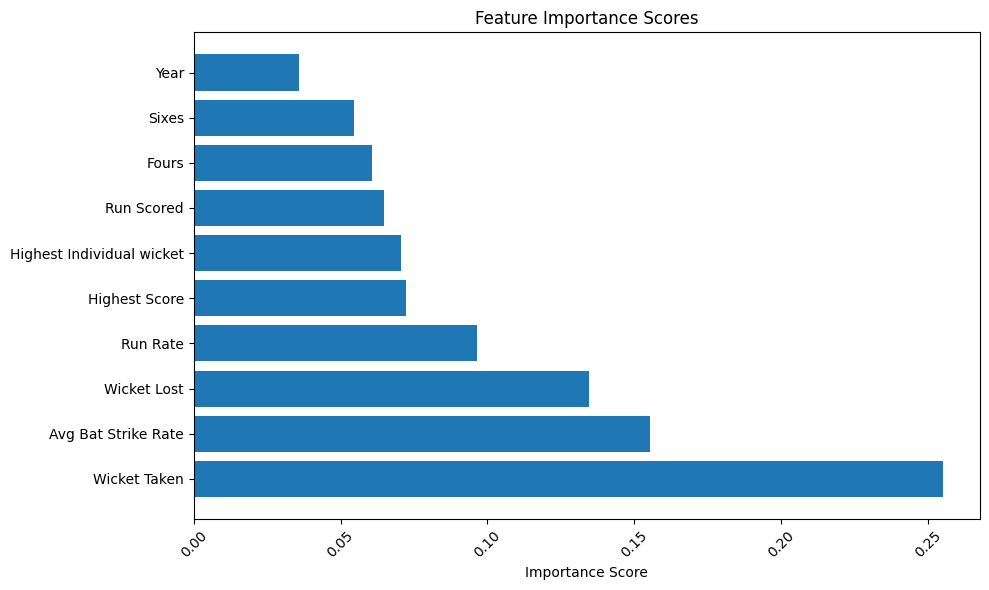

In [126]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y) from the encoded DataFrame
X = df_encoded.drop(columns=['Result'])  # Features
y = df_encoded['Result']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the model for feature selection (e.g., RandomForestClassifier)
model = RandomForestClassifier()

# 4. Apply RFE
num_features_to_select = 10  # Choose the number of features you want to select
rfe = RFE(model, n_features_to_select=num_features_to_select)

# 5. Fit RFE to the training data
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]

# Get the feature importance scores
feature_importance = rfe.estimator_.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})

# Sort the DataFrame by importance score
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Accuracy: 0.7843137254901961


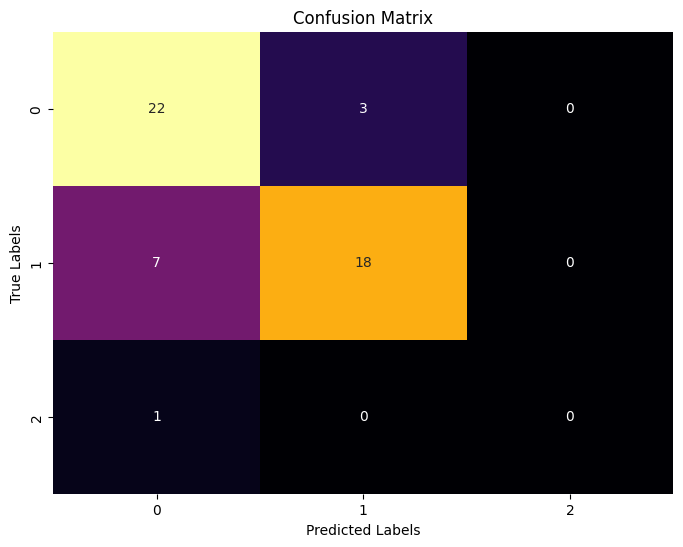

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the decision tree classifier
decision_tree_model = DecisionTreeClassifier()

# Train the decision tree model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Accuracy: 0.8823529411764706

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           2       0.88      0.88      0.88        25
           3       0.00      0.00      0.00         1

    accuracy                           0.88        51
   macro avg       0.59      0.60      0.59        51
weighted avg       0.87      0.88      0.87        51



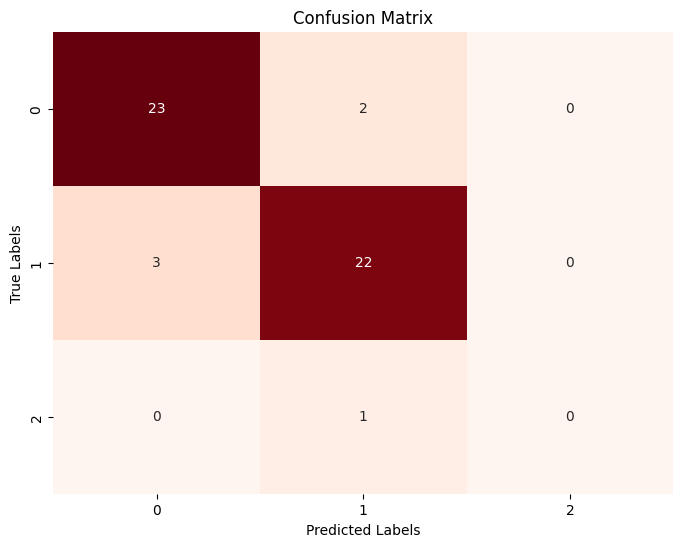

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming X contains all features, 'selected_features' contains the selected feature names,
# and 'y' is the target variable
selected_features = ['Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken',
       'Highest Individual wicket']
X_selected = X[selected_features]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.8627450980392157

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           2       0.88      0.84      0.86        25
           3       0.00      0.00      0.00         1

    accuracy                           0.86        51
   macro avg       0.58      0.59      0.58        51
weighted avg       0.85      0.86      0.85        51



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


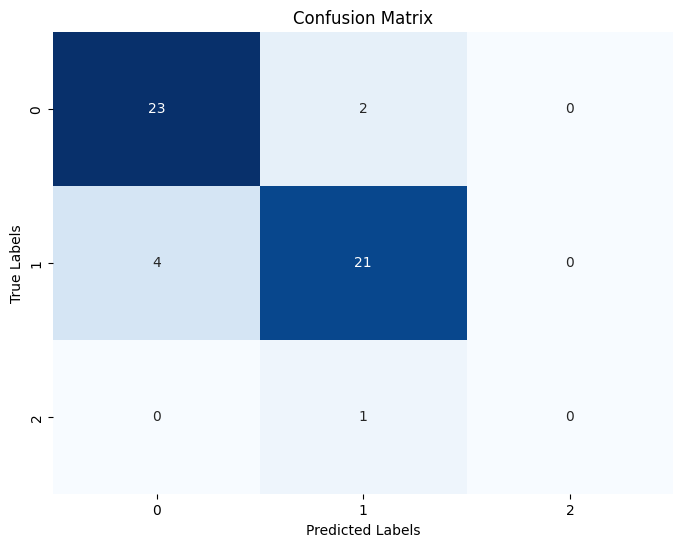

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.8627450980392157

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.00      0.00      0.00         0
           2       0.92      0.88      0.90        25
           3       0.00      0.00      0.00         1

    accuracy                           0.86        51
   macro avg       0.45      0.44      0.44        51
weighted avg       0.88      0.86      0.87        51



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

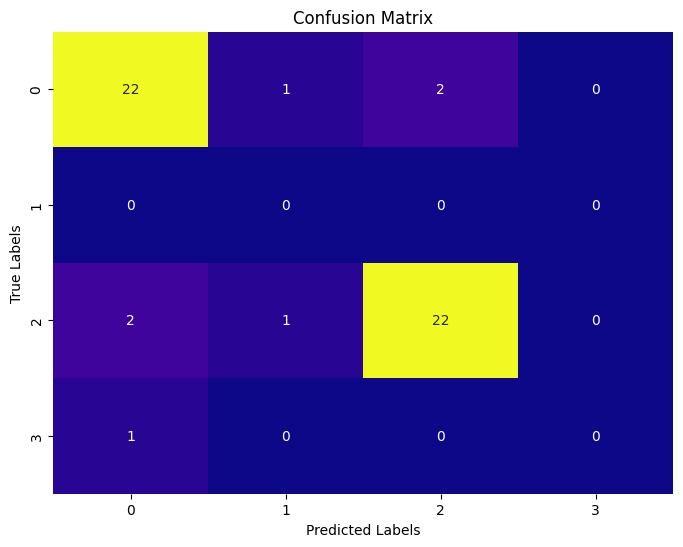

In [121]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [18]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.7 MB/s eta 0:00:00


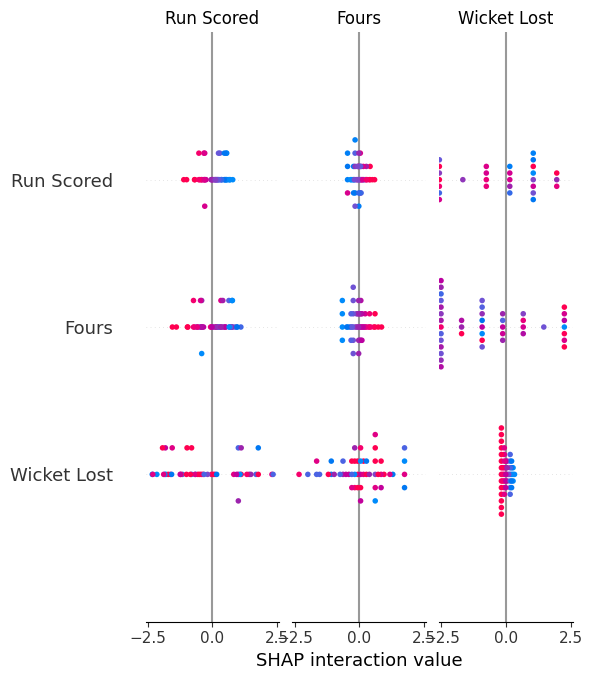

In [19]:
import shap

# Initialize the SHAP explainer with the logistic regression model
explainer = shap.Explainer(logistic_regression_model, X_train)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

Accuracy: 0.8823529411764706


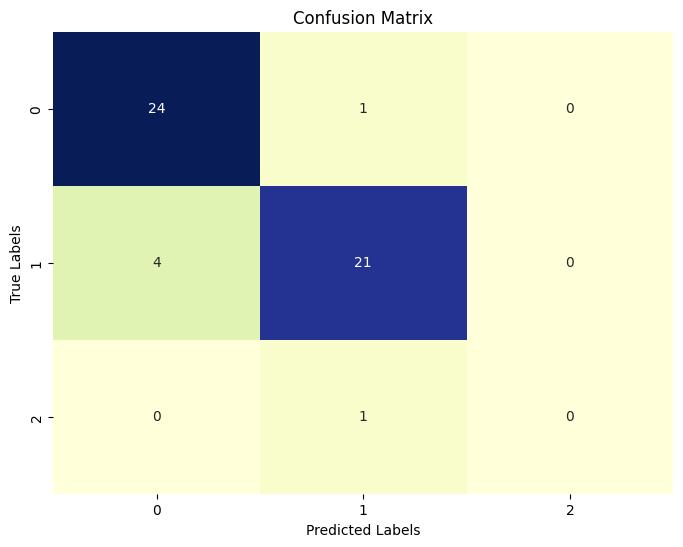

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Define your features (X) and target variable (y) from the encoded DataFrame
X = df_encoded.drop(columns=['Result'])  # Features
y = df_encoded['Result']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the Gradient Boosting model
gbm_model = GradientBoostingClassifier()

# 4. Fit the model to the training data
gbm_model.fit(X_train, y_train)

# 5. Make predictions on the testing data
y_pred = gbm_model.predict(X_test)

# 6. Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()